# PROJETO FINAL

Este projeto tem como objetivo analisar os dados de início e término previstos e as datas de início e término aproximadas de atividades de uma obra real de construção civil.

A partir dessa análise, será possível concluir, para a obra em questão, onde está concentrada a maior quantidade de atrasos e a distribuição aproximada desses atrasos para que seja possível construir um modelo que simule datas de início e término de atividades relacionadas à obras de construção civil.

## IMPORTANDO BIBLIOTECAS

In [903]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import xlrd
import scipy as sp
import pandas.tseries.offsets as ts
import plotly.express as px

## IMPORTANDO A TABELA

Antes de importar a tabela, os dados foram coletados de diversas tabelas de excel, foram anonimizados e consolidados em uma única planilha em formato .csv

In [904]:
atualizacao = pd.read_csv('data/atualizacao.csv').drop('Unnamed: 0', axis=1).set_index('ID.').drop('ID.').reset_index()

In [905]:
atualizacao.sort_values(by='ID.')

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo
6263,1,1,Yes,REFERÊNCIA DE DATAS MARCO E EQUIPAMENTOS,NaN,767 d,2020-02-03 00:00:00,2023-03-31 00:00:00,2020-03-30 00:00:00,2023-04-07 00:00:00,NaN,NaN,NaN,NaN,2022-11-01
5275,10,4,Yes,FIM DO EMBOÇO DA FACHADA,NaN,1 d,2022-07-29 00:00:00,2022-07-29 00:00:00,2022-08-29 00:00:00,2022-08-30 00:00:00,1,NaN,NaN,NaN,2022-09-01
3485,100,3,Yes,GRUA,NaN,441 d,2020-07-07 00:00:00,2021-12-17 00:00:00,2020-07-07 00:00:00,2022-04-08 00:00:00,NaN,NaN,NaN,NaN,2022-05-01
168,1000,4,No,FIAÇÃO ELÉTRICA E ARAME GUIA DE TELEFONIA - 20...,Empresa 2,4 d,2021-07-06 00:00:00,2021-07-13 00:00:00,2021-07-14 00:00:00,2021-07-19 00:00:00,1,NaN,NaN,NaN,2021-08-01
169,1001,4,No,FIAÇÃO ELÉTRICA E ARAME GUIA DE TELEFONIA - 21...,Empresa 2,4 d,2021-07-14 00:00:00,2021-07-20 00:00:00,2021-07-20 00:00:00,2021-07-23 00:00:00,1,NaN,NaN,NaN,2021-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,9984,4,Yes,PINTURA FINAL EM HALL - 32 ANDAR,Empresa 18,2 d,2022-08-19 00:00:00,2022-08-23 00:00:00,2022-11-24 00:00:00,2022-11-25 00:00:00,1,NaN,NaN,NaN,2022-11-01
7149,9985,4,Yes,PINTURA FINAL EM HALL - 31 ANDAR,Empresa 18,2 d,2022-08-23 00:00:00,2022-08-25 00:00:00,2022-11-28 00:00:00,2022-11-29 00:00:00,1,NaN,NaN,NaN,2022-11-01
7150,9986,4,Yes,PINTURA FINAL EM HALL - 30 ANDAR,Empresa 18,2 d,2022-08-25 00:00:00,2022-08-29 00:00:00,2022-11-30 00:00:00,2022-12-01 00:00:00,1,NaN,NaN,NaN,2022-11-01
7151,9987,4,Yes,PINTURA FINAL EM HALL - 29 ANDAR,Empresa 18,2 d,2022-08-29 00:00:00,2022-08-31 00:00:00,2022-12-02 00:00:00,2022-12-05 00:00:00,1,NaN,NaN,NaN,2022-11-01


In [906]:
atualizacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7315 entries, 0 to 7314
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID.                     7315 non-null   object
 1   Outline                 7315 non-null   object
 2   Critical                7315 non-null   object
 3   Descrição dos Serviços  7315 non-null   object
 4   Empreiteiro             4985 non-null   object
 5   Dur                     7315 non-null   object
 6   Início                  7315 non-null   object
 7   Fim                     7315 non-null   object
 8   Início.1                7315 non-null   object
 9   Fim.1                   7315 non-null   object
 10  %                       4937 non-null   object
 11  Início.2                1044 non-null   object
 12  Fim.2                   1102 non-null   object
 13  Observações             722 non-null    object
 14  periodo                 7315 non-null   object
dtypes: o

## TRATANDO OS DADOS

Através do método .info() utilizado acima, é possível observar que todos os dados estão com Dtype 'object'. É preciso que transformemos esses dados para o tipo correto.

### DADOS DE NÚMEROS TIPO FLOAT

A coluna 'Dur' contem a duração de cada atividade, mas contém a letra 'd' para representar a duração em dias após o número. Para transfomrarmos essa coluna em float, vamos utilizar regex para remover a letra 'd' e para substirtuir o separador decimal ',' por '.'.

In [907]:
def remove_d(x):
    return re.sub(' d', '', x)
def remove_e(x):
    return re.sub(' ed', '', x)
def change_decimal(x):
    return re.sub(',', '.',x)

atualizacao['Dur'] = atualizacao['Dur'].map(remove_d)
atualizacao['Dur'] = atualizacao['Dur'].map(remove_e)
atualizacao['Dur'] = atualizacao['Dur'].map(change_decimal)

In [908]:
num_inteiros = ['%', 'Dur']
for col in num_inteiros:
    atualizacao[col] = atualizacao[col].map(float)

In [909]:
atualizacao.head()

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo
0,171,4,Yes,ESTRUTURA DA TORRE TIPO - 29 ANDAR,Empresa 1,6.0,2021-05-08 00:00:00,2021-05-14 00:00:00,2021-06-15 00:00:00,2021-06-21 00:00:00,1.0,NaN,NaN,NaN,2021-07-01
1,172,4,Yes,ESTRUTURA DA TORRE TIPO - 30 ANDAR,Empresa 1,6.0,2021-05-15 00:00:00,2021-05-21 00:00:00,2021-06-22 00:00:00,2021-06-28 00:00:00,1.0,NaN,NaN,NaN,2021-07-01
2,173,4,Yes,ESTRUTURA DA TORRE TIPO - 31 ANDAR,Empresa 1,6.0,2021-05-22 00:00:00,2021-05-28 00:00:00,2021-06-29 00:00:00,2021-07-05 00:00:00,1.0,NaN,NaN,NaN,2021-07-01
3,215,4,Yes,INSTALAÇÃO ELÉTRICA EMBUTIDA NA ESTRUTURA - 29...,Empresa 2,2.0,2021-05-13 00:00:00,2021-05-14 00:00:00,2021-06-19 00:00:00,2021-06-21 00:00:00,1.0,NaN,NaN,NaN,2021-07-01
4,216,4,Yes,INSTALAÇÃO ELÉTRICA EMBUTIDA NA ESTRUTURA - 30...,Empresa 2,2.0,2021-05-20 00:00:00,2021-05-21 00:00:00,2021-06-26 00:00:00,2021-06-28 00:00:00,1.0,NaN,NaN,NaN,2021-07-01


## DADOS DO TIPO INT

Temos apenas uma coluna do tipo int, que é a 'ID.', então vamos transformar esses dados.

In [910]:
atualizacao['ID.'] = atualizacao['ID.'].map(int)

A coluna 'ID.' não contém, necessariamente, a sequência executiva da obra, mas contém a sequência em que foi montado o cronograma e, por isso, é interessante ordenar a tabela de acordo com esse dado.

In [911]:
atualizacao = atualizacao.sort_values(by='ID.', ascending=True)

In [912]:
atualizacao

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo
6263,1,1,Yes,REFERÊNCIA DE DATAS MARCO E EQUIPAMENTOS,NaN,767.0,2020-02-03 00:00:00,2023-03-31 00:00:00,2020-03-30 00:00:00,2023-04-07 00:00:00,NaN,NaN,NaN,NaN,2022-11-01
5273,2,2,Yes,DATAS MARCO DE FINALIZAÇÃO,NaN,183.5,2021-11-05 00:00:00,2022-07-29 00:00:00,2021-12-13 00:00:00,2022-08-30 00:00:00,NaN,NaN,NaN,NaN,2022-09-01
2893,3,3,Yes,FIM DA ESTRUTURA (10 a 12 meses antes do fim d...,NaN,1.0,2021-12-06 00:00:00,2021-12-06 00:00:00,2022-01-31 00:00:00,2022-01-31 00:00:00,NaN,NaN,NaN,NaN,2022-03-01
2894,4,4,Yes,FIM DA ESTRUTURA - TORRE,NaN,1.0,2021-12-06 00:00:00,2021-12-06 00:00:00,2022-01-31 00:00:00,2022-01-31 00:00:00,1.0,NaN,NaN,NaN,2022-03-01
1550,5,3,Yes,LIBERAÇÃO PARA MONTAGEM DOS ELEVADORES (45 dia...,NaN,1.0,2021-11-05 00:00:00,2021-11-05 00:00:00,2021-12-28 00:00:00,2021-12-28 00:00:00,NaN,NaN,NaN,NaN,2021-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,12136,3,Yes,TCA (Termo de compromisso ambiental),NaN,52.0,2022-11-10 00:00:00,2023-01-20 00:00:00,2022-10-13 00:00:00,2022-12-23 00:00:00,NaN,NaN,NaN,NaN,2022-11-01
7313,12137,4,Yes,ATENDIMENTO AO TCA - ENGENHARIA (plantio/ subs...,NaN,30.0,2022-11-10 00:00:00,2022-12-21 00:00:00,2022-10-13 00:00:00,2022-11-23 00:00:00,0.3,2022-10-31 00:00:00,2023-01-20 00:00:00,NaN,2022-11-01
7314,12138,4,Yes,ATENDIMENTO AO TCA - INCORPORAÇÃO (documentaçã...,NaN,30.0,2022-12-21 00:00:00,2023-01-20 00:00:00,2022-11-23 00:00:00,2022-12-23 00:00:00,NaN,2023-01-23 00:00:00,2023-02-17 00:00:00,NaN,2022-11-01
6261,12139,3,Yes,TCA (Termo de compromisso ambiental),NaN,51.0,2022-11-10 00:00:00,2023-01-20 00:00:00,2022-10-28 00:00:00,2023-01-07 00:00:00,NaN,NaN,NaN,NaN,2022-10-01


## DADOS DO TIPO DATE_TIME

In [913]:
lista_date_time = ['Início', 'Fim', 'Início.1', 'Fim.1', 'Início.2', 'Fim.2', 'periodo']
for col in lista_date_time:
    atualizacao[col] = pd.to_datetime(atualizacao[col], format='%Y-%m-%d')

In [914]:
atualizacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7315 entries, 6263 to 6262
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID.                     7315 non-null   int64         
 1   Outline                 7315 non-null   object        
 2   Critical                7315 non-null   object        
 3   Descrição dos Serviços  7315 non-null   object        
 4   Empreiteiro             4985 non-null   object        
 5   Dur                     7315 non-null   float64       
 6   Início                  7315 non-null   datetime64[ns]
 7   Fim                     7315 non-null   datetime64[ns]
 8   Início.1                7315 non-null   datetime64[ns]
 9   Fim.1                   7315 non-null   datetime64[ns]
 10  %                       4937 non-null   float64       
 11  Início.2                1044 non-null   datetime64[ns]
 12  Fim.2                   1102 non-null   datet

## REMOVENDO DADOS DESNECESSÁRIOS

O dataframe ainda contém alguns dados que podem atrapalhar no desenvolvimento da analise e do modelo e, por isso, vamos dropar algumas linhas.

Algumas das linhas contém o acumulado de datas marco de diversas atividades e outras são atividades que não afetam diretamente o cronograma da obra, ou seja, o atraso não é significativo.

Vamos começar removendo as atividades que não pertencem ao caminho crítico da obra. Essa limpeza será fácil, pois a coluna 'Critical' indica se a atividade está ou não no caminho crítico.

In [915]:
mask_crit = atualizacao['Critical'] == 'Yes'
atualizacao = atualizacao[mask_crit]

Agora iremos remover as atividades que não pertêncem aos andares Tipo, pois as atividades dos pavimentos tipo são as principais atividades do cronograma da obra.

In [916]:
mask_andar = atualizacao['Descrição dos Serviços'].str.contains(' ANDAR')
atualizacao_andar = atualizacao[mask_andar]
atualizacao_andar.head()

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo
0,171,4,Yes,ESTRUTURA DA TORRE TIPO - 29 ANDAR,Empresa 1,6.0,2021-05-08,2021-05-14,2021-06-15,2021-06-21,1.0,NaT,NaT,NaN,2021-07-01
1,172,4,Yes,ESTRUTURA DA TORRE TIPO - 30 ANDAR,Empresa 1,6.0,2021-05-15,2021-05-21,2021-06-22,2021-06-28,1.0,NaT,NaT,NaN,2021-07-01
2,173,4,Yes,ESTRUTURA DA TORRE TIPO - 31 ANDAR,Empresa 1,6.0,2021-05-22,2021-05-28,2021-06-29,2021-07-05,1.0,NaT,NaT,NaN,2021-07-01
77,174,4,Yes,ESTRUTURA DA TORRE TIPO - 32 ANDAR,Empresa 1,6.0,2021-05-29,2021-06-04,2021-07-06,2021-07-12,1.0,NaT,NaT,NaN,2021-08-01
78,175,4,Yes,ESTRUTURA DA TORRE TIPO - 33 ANDAR,Empresa 1,6.0,2021-06-05,2021-06-11,2021-07-13,2021-07-19,1.0,NaT,NaT,NaN,2021-08-01


As colunas 'Início.1' e 'Fim.1' são datas reprogramadas das colunas 'Início' e 'Fim'. E as colunas 'Início.2' e 'Fim.2' são datas reprogamadas das colunas 'Início.1' e 'Fim.1.

Dessa forma, podemos ficar com apenas as colunas 'Início' e 'Fim', pois são datas programadas pelo cronograma inicial da obra, e com as colunas com datas reprogramadas que contenham a data mais tarde.

In [917]:
mask_date = atualizacao_andar.loc[:,'Início.2'] > pd.to_datetime('1800-01-01', format='%Y-%m-%d')
atualizacao_date = atualizacao_andar[mask_date]
atualizacao_date['Início.1'] = atualizacao_date['Início.2']
atualizacao_date['Fim.1'] = atualizacao_date['Fim.2']
atualizacao_andar[mask_date] = atualizacao_date

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/796217998.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/796217998.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/796217998.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [918]:
atualizacao_andar[mask_date]

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo
94,261,4,Yes,RETIRADA DO REESCORAMENTO E LIMPEZA DA ESTRUTU...,NaN,3.0,2021-07-03,2021-07-06,2021-08-16,2021-08-21,NaN,2021-08-16,2021-08-21,NaN,2021-08-01
95,262,4,Yes,RETIRADA DO REESCORAMENTO E LIMPEZA DA ESTRUTU...,NaN,3.0,2021-07-10,2021-07-13,2021-08-23,2021-08-28,NaN,2021-08-23,2021-08-28,NaN,2021-08-01
334,265,4,Yes,RETIRADA DO REESCORAMENTO E LIMPEZA DA ESTRUTU...,NaN,3.0,2021-08-07,2021-08-10,2021-09-15,2021-09-17,NaN,2021-09-15,2021-09-17,NaN,2021-09-01
335,266,4,Yes,RETIRADA DO REESCORAMENTO E LIMPEZA DA ESTRUTU...,NaN,3.0,2021-08-19,2021-08-21,2021-09-27,2021-09-29,NaN,2021-09-27,2021-09-29,NaN,2021-09-01
359,506,4,Yes,PRUMADAS HIDRO-SANITÁRIAS - 36 ANDAR,Empresa 2,3.0,2021-08-23,2021-08-25,2021-09-16,2021-09-20,NaN,2021-09-16,2021-09-20,NaN,2021-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,9611,4,Yes,CONTRAPISO EM HALL DE SERVIÇO - 31 ANDAR,Empresa 4,3.0,2021-11-29,2021-12-01,2022-02-24,2022-03-02,NaN,2022-02-24,2022-03-02,NaN,2022-02-01
2794,9612,4,Yes,CONTRAPISO EM HALL DE SERVIÇO - 32 ANDAR,Empresa 4,3.0,2021-12-06,2021-12-08,2022-03-03,2022-03-09,NaN,2022-03-03,2022-03-09,NaN,2022-02-01
3407,9684,4,Yes,CONTRAPISO EM HALL DE SERVIÇO - 32 ANDAR,Empresa 4,3.0,2021-12-06,2021-12-08,2022-03-21,2022-03-25,NaN,2022-03-21,2022-03-25,NaN,2022-03-01
3408,9686,4,Yes,CONTRAPISO EM HALL DE SERVIÇO - 34 ANDAR,Empresa 4,3.0,2021-12-20,2021-12-22,2022-04-04,2022-04-08,NaN,2022-04-04,2022-04-08,NaN,2022-03-01


In [919]:
# Incluir colunas atraso_início_relativo e dur_real

# Analisar a % de atividades que atrasam por atividade (duração) e por andar (atraso_início)

# Criar modelo

## SEPARANDO O DATAFRAME

### POR TORRE

In [920]:
atualizacao_andar['Andar'] = 0
for andar in range(6, 40):
    mask_andar = atualizacao_andar['Descrição dos Serviços'].str.contains(f' {andar} ANDAR')
    atualizacao_andar.loc[mask_andar, 'Andar'] = andar

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/1557798898.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [921]:
mask_b = atualizacao['Descrição dos Serviços'].str.contains(f'TORRE B')
atualizacao_b  = atualizacao[mask_b]
atualizacao_b.head()

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo
558,5664,1,Yes,TORRE SKY VIEW - TORRE B,NaN,843.0,2020-03-10,2023-06-26,2020-03-10,2023-07-03,NaN,NaT,NaT,NaN,2021-09-01
2594,5676,1,Yes,TORRE SKY VIEW - TORRE B,NaN,836.0,2020-03-10,2023-06-26,2020-03-10,2023-06-26,NaN,NaT,NaT,NaN,2022-02-01
6724,5710,1,Yes,TORRE SKY VIEW - TORRE B,NaN,836.0,2020-03-10,2023-06-26,2020-03-10,2023-06-26,NaN,NaT,NaT,NaN,2022-11-01


In [922]:
atualizacao_andar['torre'] = ''
mask_torre_b = atualizacao_andar['ID.'] >= 5664
atualizacao_andar.loc[mask_torre_b, 'torre'] = 'B'
atualizacao_torre_b = atualizacao_andar[mask_torre_b]

mask_torre_a = atualizacao_andar['ID.'] < 5664
atualizacao_andar.loc[mask_torre_a, 'torre'] = 'A'
atualizacao_torre_a = atualizacao_andar[mask_torre_a]


C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/4051852994.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [923]:
atualizacao_torre_a.head()

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo,Andar,torre
0,171,4,Yes,ESTRUTURA DA TORRE TIPO - 29 ANDAR,Empresa 1,6.0,2021-05-08,2021-05-14,2021-06-15,2021-06-21,1.0,NaT,NaT,NaN,2021-07-01,29,A
1,172,4,Yes,ESTRUTURA DA TORRE TIPO - 30 ANDAR,Empresa 1,6.0,2021-05-15,2021-05-21,2021-06-22,2021-06-28,1.0,NaT,NaT,NaN,2021-07-01,30,A
2,173,4,Yes,ESTRUTURA DA TORRE TIPO - 31 ANDAR,Empresa 1,6.0,2021-05-22,2021-05-28,2021-06-29,2021-07-05,1.0,NaT,NaT,NaN,2021-07-01,31,A
77,174,4,Yes,ESTRUTURA DA TORRE TIPO - 32 ANDAR,Empresa 1,6.0,2021-05-29,2021-06-04,2021-07-06,2021-07-12,1.0,NaT,NaT,NaN,2021-08-01,32,A
78,175,4,Yes,ESTRUTURA DA TORRE TIPO - 33 ANDAR,Empresa 1,6.0,2021-06-05,2021-06-11,2021-07-13,2021-07-19,1.0,NaT,NaT,NaN,2021-08-01,33,A


In [924]:
atualizacao_torre_b.head()

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo,Andar,torre
60,5704,4,Yes,ESTRUTURA DA TORRE TIPO - 16 ANDAR,Empresa 7,6.0,2021-05-15,2021-05-21,2021-06-25,2021-06-30,1.0,2021-06-25,2021-06-30,Concreto não deu pega. 2 dias de atraso,2021-07-01,16,B
242,5706,4,Yes,ESTRUTURA DA TORRE TIPO - 18 ANDAR,Empresa 7,7.0,2021-05-29,2021-06-04,2021-07-10,2021-07-16,1.0,2021-07-10,2021-07-16,NaN,2021-08-01,18,B
243,5707,4,Yes,ESTRUTURA DA TORRE TIPO - 19 ANDAR,Empresa 7,6.0,2021-06-05,2021-06-11,2021-07-17,2021-07-23,1.0,2021-07-17,2021-07-23,NaN,2021-08-01,19,B
244,5708,4,Yes,ESTRUTURA DA TORRE TIPO - 20 ANDAR,Empresa 7,6.0,2021-06-12,2021-06-18,2021-07-24,2021-07-30,1.0,2021-07-24,2021-07-30,NaN,2021-08-01,20,B
245,5709,4,Yes,ESTRUTURA DA TORRE TIPO - 21 ANDAR,Empresa 7,6.0,2021-06-19,2021-06-25,2021-07-31,2021-08-07,1.0,2021-07-31,2021-08-07,NaN,2021-08-01,21,B


### POR ANDAR

In [925]:
def separador_andar(df):
    lista_andar = []
    for andar in range(6, 40):
        mask_andar = df['Descrição dos Serviços'].str.contains(f' {andar} ANDAR')
        df_andar = df[mask_andar].drop_duplicates(subset='Descrição dos Serviços', keep='last')
        df_andar['Andar'] = andar
        lista_andar.append(df_andar)
    return lista_andar

In [926]:
lista_andares = separador_andar(atualizacao_torre_a)

In [927]:
max_len = 0
for i in range(0,33):
    if len(lista_andares[i]) > max_len:
        max_len = len(lista_andares[i])
    print(f'i={i} -> max_len={max_len}')

i=0 -> max_len=0
i=1 -> max_len=20
i=2 -> max_len=20
i=3 -> max_len=20
i=4 -> max_len=20
i=5 -> max_len=20
i=6 -> max_len=21
i=7 -> max_len=21
i=8 -> max_len=21
i=9 -> max_len=21
i=10 -> max_len=21
i=11 -> max_len=21
i=12 -> max_len=21
i=13 -> max_len=21
i=14 -> max_len=30
i=15 -> max_len=32
i=16 -> max_len=32
i=17 -> max_len=32
i=18 -> max_len=32
i=19 -> max_len=38
i=20 -> max_len=38
i=21 -> max_len=38
i=22 -> max_len=38
i=23 -> max_len=40
i=24 -> max_len=40
i=25 -> max_len=46
i=26 -> max_len=46
i=27 -> max_len=46
i=28 -> max_len=46
i=29 -> max_len=46
i=30 -> max_len=48
i=31 -> max_len=59
i=32 -> max_len=59


In [928]:
#fig, ax = plt.subplots(figsize=(30, 10))
fig = px.timeline(lista_andares[31], x_start="Início", x_end="Fim", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

In [929]:
fig = px.timeline(lista_andares[31], x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

### POR ATIVIDADE

In [930]:
pattern = r' - \d+ ANDAR'
atualizacao_andar['Atividade'] = atualizacao_andar['Descrição dos Serviços'].map(lambda x: re.sub(pattern, '', x))

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/2888225236.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [931]:
lista_atividades = list(atualizacao_andar['Atividade'].unique())
len(lista_atividades)

89

In [932]:
lista_atividades

['ESTRUTURA DA TORRE TIPO',
 'INSTALAÇÃO ELÉTRICA EMBUTIDA NA ESTRUTURA',
 'RETIRADA DO REESCORAMENTO E LIMPEZA DA ESTRUTURA',
 'PRUMADAS HIDRO-SANITÁRIAS',
 'CHUMBAMENTO DE PRUMADAS',
 'MARCAÇÃO TOTAL DA ALVENARIA',
 'ELEVAÇÃO TOTAL DA ALVENARIA',
 'CHUMBAMENTO DE CAIXAS ELÉTRICAS',
 'DISTRIBUIÇÃO HIDRÁULICA DE TETO',
 'CONTRAPISO NAS ÁREAS SECAS (incluso cozinha)',
 'PONTOS E FAIXAS - ÁREAS SECAS',
 'PONTOS E FAIXAS - ÁREAS ÚMIDAS',
 'FUNDOS DE QUADROS ELÉTRICOS',
 'POSICIONAMENTO E CHUMBAMENTO DE CONTRAMARCOS',
 'DISTRIBUIÇÃO HIDRÁULICA EM PAREDES',
 'DISTRIBUIÇÃO DE GÁS EM PAREDES',
 'INFRAESTRUTURA DE AR CONDICIONADO',
 'INFRAESTRUTURA DE EXAUSTÃO',
 'FIAÇÃO ELÉTRICA E ARAME GUIA DE TELEFONIA',
 'FIAÇÃO DE TELEFONIA',
 'FIXAÇÃO DA ALVENARIA',
 'EMBOÇO ÁREAS FRIAS',
 'GESSO EM ÁREAS SECAS E TETO',
 'ESTRUTURA PARA DRYWALL EM SHAFTS',
 'DISTRIBUIÇÃO HIDRAULICA PEX (parede)',
 'TESTES EM TUBULAÇÕES DE PAREDES',
 'FECHAMENTO DE SHAFT COM DRYWALL',
 'PINTURA POLIMÉRICA E TESTES',
 'CON

In [933]:
atualizacao_andar.tail()

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo,Andar,torre,Atividade
3887,9691,4,Yes,CONTRAPISO EM HALL DE SERVIÇO - 39 ANDAR,Empresa 4,3.0,2022-01-26,2022-01-28,2022-04-28,2022-05-02,1.0,NaT,NaT,NaN,2022-05-01,39,B,CONTRAPISO EM HALL DE SERVIÇO
7148,9984,4,Yes,PINTURA FINAL EM HALL - 32 ANDAR,Empresa 18,2.0,2022-08-19,2022-08-23,2022-11-24,2022-11-25,1.0,NaT,NaT,NaN,2022-11-01,32,B,PINTURA FINAL EM HALL
7149,9985,4,Yes,PINTURA FINAL EM HALL - 31 ANDAR,Empresa 18,2.0,2022-08-23,2022-08-25,2022-11-28,2022-11-29,1.0,NaT,NaT,NaN,2022-11-01,31,B,PINTURA FINAL EM HALL
7150,9986,4,Yes,PINTURA FINAL EM HALL - 30 ANDAR,Empresa 18,2.0,2022-08-25,2022-08-29,2022-11-30,2022-12-01,1.0,NaT,NaT,NaN,2022-11-01,30,B,PINTURA FINAL EM HALL
7151,9987,4,Yes,PINTURA FINAL EM HALL - 29 ANDAR,Empresa 18,2.0,2022-08-29,2022-08-31,2022-12-02,2022-12-05,1.0,NaT,NaT,NaN,2022-11-01,29,B,PINTURA FINAL EM HALL


In [934]:
def separador_ativ(df):
    lista_ativ = []
    for ativ in lista_atividades:
        mask_ativ = df['Descrição dos Serviços'].str.contains(ativ)
        df_ativ = df[mask_ativ]
        lista_ativ.append(df_ativ)
    return lista_ativ

In [935]:
lista_ativ = separador_ativ(atualizacao_torre_a)

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/1879240096.py:4: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [936]:
len(lista_ativ)

89

In [1044]:
fig = px.timeline(lista_ativ[41].sort_values(by='Andar'), x_start="Início", x_end="Fim", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

In [1045]:
fig = px.timeline(lista_ativ[41].sort_values(by='Início.1'), x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

In [939]:
fig = px.timeline(atualizacao_andar, x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
#fig.update_layout(autosize=False,width=1960,height=3000,margin=dict(l=50,r=50,b=100,t=100,pad=4))
fig.show()

In [940]:
fig = px.timeline(atualizacao_andar, x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
#fig.update_layout(autosize=False,width=1960,height=3000,margin=dict(l=50,r=50,b=100,t=100,pad=4))
fig.show()

In [941]:
atualizacao_andar['Fim']

0      2021-05-14
1      2021-05-21
2      2021-05-28
77     2021-06-04
78     2021-06-11
          ...    
3887   2022-01-28
7148   2022-08-23
7149   2022-08-25
7150   2022-08-29
7151   2022-08-31
Name: Fim, Length: 2404, dtype: datetime64[ns]

In [942]:
atualizacao_andar['Fim'].shift(1)

0             NaT
1      2021-05-14
2      2021-05-21
77     2021-05-28
78     2021-06-04
          ...    
3887   2022-01-21
7148   2022-01-28
7149   2022-08-23
7150   2022-08-25
7151   2022-08-29
Name: Fim, Length: 2404, dtype: datetime64[ns]

## CRIANDO AS COLUNAS DE ATRASO

In [943]:
for ativ in lista_atividades:
    mask_ativ = atualizacao_andar['Descrição dos Serviços'].str.contains(ativ)
    atualizacao_andar.loc[mask_ativ, 'ordem_ativ'] = int(lista_atividades.index(ativ))

c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\mathe\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/1311541991.py:2: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [944]:
atualizacao_andar=atualizacao_andar.sort_values(by=['torre', 'Andar', 'Início','ordem_ativ']).drop(['Início.2', 'Fim.2'], axis=1)

In [945]:
atualizacao_andar['fim_predecessora'] = atualizacao_andar['Fim'].shift(1).fillna(atualizacao_andar['Início'])
atualizacao_andar['fim_predecessora.1'] = atualizacao_andar['Fim.1'].shift(1).fillna(atualizacao_andar['Início.1'])
atualizacao_andar.head(20)

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Observações,periodo,Andar,torre,Atividade,ordem_ativ,fim_predecessora,fim_predecessora.1
1971,795,4,Yes,FUNDOS DE QUADROS ELÉTRICOS - 7 ANDAR,Empresa 2,3.0,2021-03-09,2021-03-11,2021-12-14,2021-12-16,1.0,NaN,2022-01-01,7,A,FUNDOS DE QUADROS ELÉTRICOS,12.0,2021-03-09,2021-12-14
1594,829,4,Yes,POSICIONAMENTO E CHUMBAMENTO DE CONTRAMARCOS -...,Empresa 9,2.0,2021-03-12,2021-03-18,2021-12-29,2021-12-30,1.0,NaN,2021-12-01,7,A,POSICIONAMENTO E CHUMBAMENTO DE CONTRAMARCOS,13.0,2021-03-11,2021-12-16
1973,863,4,Yes,DISTRIBUIÇÃO HIDRÁULICA EM PAREDES - 7 ANDAR,Empresa 2,3.0,2021-03-19,2021-03-23,2021-12-28,2021-12-30,1.0,NaN,2022-01-01,7,A,DISTRIBUIÇÃO HIDRÁULICA EM PAREDES,14.0,2021-03-18,2021-12-30
2336,931,4,Yes,INFRAESTRUTURA DE AR CONDICIONADO - 7 ANDAR,NaN,3.0,2021-03-29,2021-03-31,2022-02-23,2022-02-25,NaN,NaN,2022-02-01,7,A,INFRAESTRUTURA DE AR CONDICIONADO,16.0,2021-03-23,2021-12-30
1980,965,4,Yes,INFRAESTRUTURA DE EXAUSTÃO - 7 ANDAR,NaN,3.0,2021-03-29,2021-03-31,2022-01-06,2022-01-10,1.0,NaN,2022-01-01,7,A,INFRAESTRUTURA DE EXAUSTÃO,17.0,2021-03-31,2022-02-25
1606,999,4,Yes,FIAÇÃO ELÉTRICA E ARAME GUIA DE TELEFONIA - 7 ...,Empresa 2,4.0,2021-04-01,2021-04-08,2021-12-17,2021-12-22,1.0,NaN,2021-12-01,7,A,FIAÇÃO ELÉTRICA E ARAME GUIA DE TELEFONIA,18.0,2021-03-31,2022-01-10
1985,1033,4,Yes,FIAÇÃO DE TELEFONIA - 7 ANDAR,Empresa 2,2.0,2021-04-09,2021-04-12,2021-12-30,2022-01-03,NaN,NaN,2022-01-01,7,A,FIAÇÃO DE TELEFONIA,19.0,2021-04-08,2021-12-22
529,4349,4,Yes,REVESTIMENTO EM HALL DE SERVIÇO - 7 ANDAR,Empresa 3,3.0,2021-04-27,2021-04-29,2021-08-20,2021-08-24,NaN,NaN,2021-09-01,7,A,REVESTIMENTO EM HALL DE SERVIÇO,80.0,2021-04-12,2022-01-03
3625,3293,4,Yes,MONTAGEM DE BUSWAY - 7 ANDAR,Empresa 2,1.0,2021-11-08,2021-11-08,2022-04-08,2022-04-08,1.0,Executado até o 39°Pav,2022-05-01,7,A,MONTAGEM DE BUSWAY,71.0,2021-04-29,2021-08-24
4083,3946,4,Yes,TESTES EM GERAL EM HALL - 7 ANDAR,Empresa 2,1.0,2022-03-29,2022-03-29,2022-05-27,2022-05-30,1.0,NaN,2022-06-01,7,A,TESTES EM GERAL EM HALL,79.0,2021-11-08,2022-04-08


### ATRASO INÍCIO

In [946]:
atualizacao_andar['atraso_inicio'] = np.busday_count(atualizacao_andar['fim_predecessora'].values.astype('datetime64[D]'), atualizacao_andar['Início'].values.astype('datetime64[D]'))
atualizacao_andar['atraso_inicio.1'] = np.busday_count(atualizacao_andar['fim_predecessora.1'].values.astype('datetime64[D]'), atualizacao_andar['Início.1'].values.astype('datetime64[D]'))
atualizacao_andar['atraso_inicio.2'] = atualizacao_andar['atraso_inicio.1'] - atualizacao_andar['atraso_inicio']

In [947]:
atualizacao_andar['e_atraso_inicio'] = 0
mask_e_atraso = atualizacao_andar['atraso_inicio'] < atualizacao_andar['atraso_inicio.1']
atualizacao_andar.loc[mask_e_atraso, 'e_atraso_inicio'] = 1
atualizacao_andar.loc[~mask_e_atraso, 'e_atraso_inicio'] = 0

In [948]:
atualizacao_andar.groupby(by='Atividade')['e_atraso_inicio'].mean()

Atividade
 COLOCAÇÃO DE PORTA DE ENTRADA              0.611111
ACABAMENTOS ELÉTRICOS                       0.208333
ACABAMENTOS HIDRÁULICOS EM TERRAÇOS         0.565217
ARANHAS SANITÁRIAS DE TERRAÇOS/ RALOS       0.000000
ARANHAS SANITÁRIAS/ RALOS                   0.333333
                                              ...   
REVESTIMENTO DE GESSO EM HALL DE SERVIÇO    0.903226
TESTES DE INSTALAÇÕES ELÉTRICAS             0.105263
TESTES EM GERAL EM HALL                     0.151515
TESTES EM TUBULAÇÕES DE PAREDES             0.485714
TEXTURA NA REQUADRAÇÃO DOS VÃOS             1.000000
Name: e_atraso_inicio, Length: 89, dtype: float64

### ATRASO DURAÇÃO

In [949]:
atualizacao_andar['dur.1'] = np.busday_count(atualizacao_andar['Início.1'].values.astype('datetime64[D]'), atualizacao_andar['Fim.1'].values.astype('datetime64[D]'))

In [950]:
atualizacao_andar['e_atraso_dur'] = 0
mask_e_atraso = atualizacao_andar['Dur'] < atualizacao_andar['dur.1']
atualizacao_andar.loc[mask_e_atraso, 'e_atraso_dur'] = 1
atualizacao_andar.loc[~mask_e_atraso, 'e_atraso_dur'] = 0

In [951]:
atualizacao_andar['atraso_dur'] = atualizacao_andar['Dur'] - atualizacao_andar['dur.1']

In [952]:
atualizacao_andar.groupby(by='Atividade')['e_atraso_dur'].mean()

Atividade
 COLOCAÇÃO DE PORTA DE ENTRADA              0.000000
ACABAMENTOS ELÉTRICOS                       0.000000
ACABAMENTOS HIDRÁULICOS EM TERRAÇOS         0.000000
ARANHAS SANITÁRIAS DE TERRAÇOS/ RALOS       0.000000
ARANHAS SANITÁRIAS/ RALOS                   0.119048
                                              ...   
REVESTIMENTO DE GESSO EM HALL DE SERVIÇO    0.354839
TESTES DE INSTALAÇÕES ELÉTRICAS             0.052632
TESTES EM GERAL EM HALL                     0.030303
TESTES EM TUBULAÇÕES DE PAREDES             0.000000
TEXTURA NA REQUADRAÇÃO DOS VÃOS             0.000000
Name: e_atraso_dur, Length: 89, dtype: float64

In [953]:
atualizacao_stats_a = atualizacao_andar[mask_torre_a].describe().T
atualizacao_stats_b = atualizacao_andar[mask_torre_b].describe().T
mask_atraso_maior = atualizacao_andar['atraso_inicio.2'] >= 0
atualizacao_stats_maior = atualizacao_andar[mask_atraso_maior].describe().T
atualizacao_stats = atualizacao_andar.describe().T

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/2678330721.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/2678330721.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [954]:
atualizacao_stats

,count,mean,std,min,25%,50%,75%,max
ID.,2404.0,4846.628120,2769.928082,171.00,2135.75,5798.5,7362.25,9987.0
Dur,2404.0,3.228993,1.247418,1.00,2.00,3.0,4.00,10.0
%,1964.0,0.988416,0.076587,0.15,1.00,1.0,1.00,1.0
Andar,2404.0,25.653078,9.821305,0.00,18.00,27.0,34.00,39.0
ordem_ativ,2304.0,38.685330,24.592898,0.00,17.00,39.0,64.00,88.0
atraso_inicio,2404.0,-2.143927,61.946395,-450.00,0.00,1.0,3.00,177.0
atraso_inicio.1,2404.0,-2.395591,70.869397,-400.00,-5.00,1.0,16.00,313.0
atraso_inicio.2,2404.0,-0.251664,59.219268,-328.00,-6.00,0.0,12.25,316.0
e_atraso_inicio,2404.0,0.435940,0.495983,0.00,0.00,0.0,1.00,1.0
dur.1,2404.0,2.495840,1.526975,0.00,1.00,2.0,4.00,25.0


In [955]:
atualizacao_stats_b

,count,mean,std,min,25%,50%,75%,max
ID.,1259.0,7268.637014,1022.343272,5704.00,6388.5,7329.0,7736.5,9987.0
Dur,1259.0,3.313344,1.185376,1.00,2.0,3.0,4.0,10.0
%,992.0,0.979335,0.102523,0.15,1.0,1.0,1.0,1.0
Andar,1259.0,24.098491,10.441593,0.00,15.0,25.0,34.0,39.0
ordem_ativ,1195.0,34.129707,24.075274,0.00,14.0,33.0,46.0,88.0
atraso_inicio,1259.0,-2.384432,61.524240,-450.00,-1.0,1.0,2.0,177.0
atraso_inicio.1,1259.0,-2.598888,56.955122,-377.00,-5.0,1.0,12.0,254.0
atraso_inicio.2,1259.0,-0.214456,42.039539,-287.00,-5.0,0.0,10.0,231.0
e_atraso_inicio,1259.0,0.428912,0.495117,0.00,0.0,0.0,1.0,1.0
dur.1,1259.0,2.611597,1.640377,0.00,2.0,2.0,4.0,25.0


In [956]:
atualizacao_stats_maior

,count,mean,std,min,25%,50%,75%,max
ID.,1521.0,4921.196581,2778.911616,174.00,2267.0,5825.0,7419.0,9986.0
Dur,1521.0,3.224523,1.221673,1.00,2.0,3.0,4.0,10.0
%,1247.0,0.991259,0.069131,0.15,1.0,1.0,1.0,1.0
Andar,1521.0,25.274819,9.866581,0.00,18.0,27.0,34.0,39.0
ordem_ativ,1438.0,39.660640,25.185276,0.00,17.0,39.0,66.0,88.0
atraso_inicio,1521.0,-8.126890,68.976457,-450.00,-1.0,1.0,1.0,177.0
atraso_inicio.1,1521.0,15.768573,68.921201,-380.00,1.0,6.0,28.0,313.0
atraso_inicio.2,1521.0,23.895464,44.325103,0.00,0.0,6.0,26.0,316.0
e_atraso_inicio,1521.0,0.689020,0.463047,0.00,0.0,1.0,1.0,1.0
dur.1,1521.0,2.411571,1.454204,0.00,1.0,2.0,3.0,21.0


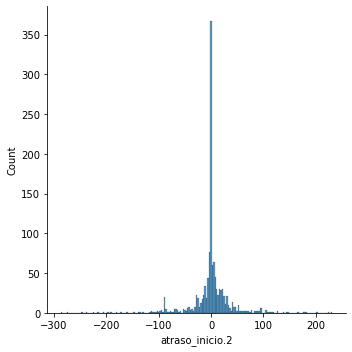

In [957]:
sns.displot(atualizacao_andar.loc[mask_torre_b, 'atraso_inicio.2'])

## CONSTRUINDO O MODELO

In [958]:
atualizacao_andar.isna().sum() / atualizacao_andar.shape[0]

ID.                       0.000000
Outline                   0.000000
Critical                  0.000000
Descrição dos Serviços    0.000000
Empreiteiro               0.225042
Dur                       0.000000
Início                    0.000000
Fim                       0.000000
Início.1                  0.000000
Fim.1                     0.000000
%                         0.183028
Observações               0.908486
periodo                   0.000000
Andar                     0.000000
torre                     0.000000
Atividade                 0.000000
ordem_ativ                0.041597
fim_predecessora          0.000000
fim_predecessora.1        0.000000
atraso_inicio             0.000000
atraso_inicio.1           0.000000
atraso_inicio.2           0.000000
e_atraso_inicio           0.000000
dur.1                     0.000000
e_atraso_dur              0.000000
atraso_dur                0.000000
dtype: float64

In [959]:
atualizacao_andar

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,...,ordem_ativ,fim_predecessora,fim_predecessora.1,atraso_inicio,atraso_inicio.1,atraso_inicio.2,e_atraso_inicio,dur.1,e_atraso_dur,atraso_dur
1971,795,4,Yes,FUNDOS DE QUADROS ELÉTRICOS - 7 ANDAR,Empresa 2,3.0,2021-03-09,2021-03-11,2021-12-14,2021-12-16,...,12.0,2021-03-09,2021-12-14,0,0,0,0,2,0,1.0
1594,829,4,Yes,POSICIONAMENTO E CHUMBAMENTO DE CONTRAMARCOS -...,Empresa 9,2.0,2021-03-12,2021-03-18,2021-12-29,2021-12-30,...,13.0,2021-03-11,2021-12-16,1,9,8,1,1,0,1.0
1973,863,4,Yes,DISTRIBUIÇÃO HIDRÁULICA EM PAREDES - 7 ANDAR,Empresa 2,3.0,2021-03-19,2021-03-23,2021-12-28,2021-12-30,...,14.0,2021-03-18,2021-12-30,1,-2,-3,0,2,0,1.0
2336,931,4,Yes,INFRAESTRUTURA DE AR CONDICIONADO - 7 ANDAR,NaN,3.0,2021-03-29,2021-03-31,2022-02-23,2022-02-25,...,16.0,2021-03-23,2021-12-30,4,39,35,1,2,0,1.0
1980,965,4,Yes,INFRAESTRUTURA DE EXAUSTÃO - 7 ANDAR,NaN,3.0,2021-03-29,2021-03-31,2022-01-06,2022-01-10,...,17.0,2021-03-31,2022-02-25,-2,-36,-34,0,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6914,8131,4,Yes,LIMPEZA FINAL - 39 ANDAR,NaN,4.0,2022-08-08,2022-08-12,2022-11-16,2022-11-21,...,52.0,2022-08-05,2022-11-15,1,1,0,0,3,0,1.0
7010,8763,4,Yes,MONTAGEM DE CHURRASQUEIRA/ COIFA - 39 ANDAR,NaN,2.0,2022-09-09,2022-09-12,2022-11-04,2022-11-08,...,64.0,2022-08-12,2022-11-21,20,-11,-31,0,2,0,0.0
7022,8801,4,Yes,MONTAGEM DE CHURRASQUEIRA/ COIFA - 39 ANDAR,NaN,2.0,2022-09-09,2022-09-12,2022-11-08,2022-11-10,...,64.0,2022-09-12,2022-11-08,-1,0,1,1,2,0,0.0
7033,8839,4,Yes,INSTALAÇAO DE VIDRO DE CHURRASQUEIRA - 39 ANDAR,NaN,2.0,2022-09-13,2022-09-14,2022-11-10,2022-11-14,...,65.0,2022-09-12,2022-11-10,1,0,-1,0,2,0,0.0


In [960]:
import scipy as sp
import pandas.tseries.offsets as ts
import random

#data_inicio = pd.to_datetime('2022-08-25', format='%Y-%m-%d')


PROB_ATRASO_INICIO = atualizacao_stats.loc['e_atraso_inicio', 'mean']
PROB_ATRASO_DUR = atualizacao_stats.loc['e_atraso_dur', 'mean']

MEDIA_ATRASO_INICIO = atualizacao_stats_maior.loc['atraso_inicio.2', 'mean']
MEDIA_ATRASO_DUR = atualizacao_stats.loc['atraso_dur', 'mean']

def simular_andar(dataframe1):
    '''Essa função simula as datas de início e término de um dataframe de atividades a partir de uma data prevista para início.
    Para isso, ela adiciona alguns dias úteis de atraso no início e na duração da atividade.
    Por fim, ela salva a data final das atividades simuladas em uma lista.'''
    data_inicio = dataframe1['Início'].min()

    dataframe1['Início_simul'] = 0
    dataframe1['Fim_simul'] = 0
    dataframe1['atraso_inicio_simul'] = 0
    dataframe1['dur_simul'] = 0


    for atividade in range(0, len(dataframe1)):
        if atividade == 0:
            if random.random() < PROB_ATRASO_INICIO:
                atraso_inicio = ts.BDay(sp.stats.poisson(MEDIA_ATRASO_INICIO).rvs(1))
                dataframe1.loc[atividade,'atraso_inicio_simul'] = atraso_inicio
                dataframe1.loc[atividade,'Início_simul'] = data_inicio + atraso_inicio
            else:
                dataframe1.loc[atividade,'Início_simul'] = data_inicio
            
            if random.random() < PROB_ATRASO_DUR:
                atraso_dur = ts.BDay(sp.stats.poisson(MEDIA_ATRASO_DUR).rvs(1)+dataframe1.loc[atividade,'Dur'])
                dataframe1.loc[atividade,'dur_simul'] = atraso_dur
                dataframe1.loc[atividade,'Fim_simul'] = dataframe1.loc[atividade, 'Início_simul'] + atraso_dur
            else:
                atraso_dur = ts.BDay(dataframe1.loc[atividade,'Dur'])
                dataframe1.loc[atividade,'Fim_simul'] = dataframe1.loc[atividade, 'Início_simul'] + atraso_dur
        else:
            if random.random() < PROB_ATRASO_INICIO:
                atraso_inicio = ts.BDay(sp.stats.poisson(MEDIA_ATRASO_INICIO).rvs(1))
                dataframe1.loc[atividade,'atraso_inicio_simul'] = atraso_inicio
                dataframe1.loc[atividade,'Início_simul'] = dataframe1.loc[atividade-1, 'Fim_simul'] + atraso_inicio
            else:
                dataframe1.loc[atividade,'Início_simul'] = dataframe1.loc[atividade-1, 'Fim_simul']
            
            if random.random() < PROB_ATRASO_DUR:
                atraso_dur = ts.BDay(sp.stats.poisson(MEDIA_ATRASO_DUR).rvs(1)+int(dataframe1.loc[atividade,'Dur']))
                dataframe1.loc[atividade,'dur_simul'] = atraso_dur
                dataframe1.loc[atividade,'Fim_simul'] = dataframe1.loc[atividade, 'Início_simul'] + atraso_dur
            else:
                #print(atividade)
                #print(dataframe1.loc[atividade,'Dur'])
                atraso_dur = ts.BDay(int(dataframe1.loc[atividade,'Dur']))
                dataframe1.loc[atividade,'Fim_simul'] = dataframe1.loc[atividade, 'Início_simul'] + atraso_dur
    return dataframe1.tail(1)['Fim_simul'].values

#simular_andar(atualizacao_andar)

def monte_carlo_andar(datafinal, num_iter):
    return [simular_andar(datafinal) for i in range(0, num_iter)]



In [961]:
data_final_andar_df = pd.DataFrame(monte_carlo_andar(lista_andares[1].dropna(subset=['Dur']).reset_index(), 1000))

In [962]:
pd.DataFrame(data_final_obra_df)

,0
0,2191-10-31
1,2185-11-03
2,2196-02-05
3,2189-12-31
4,2193-06-19
...,...
995,2188-01-23
996,2191-03-09
997,2191-12-15
998,2189-02-02


<AxesSubplot:xlabel='0', ylabel='Count'>

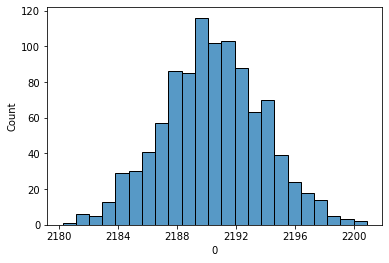

In [963]:
sns.histplot(data_final_obra_df[0])

In [964]:
data_final_andar_df

,0
0,2022-03-04
1,2022-05-17
2,2022-02-02
3,2021-12-31
4,2022-05-13
...,...
995,2022-04-15
996,2022-02-01
997,2022-01-07
998,2021-11-19


<AxesSubplot:xlabel='0', ylabel='Count'>

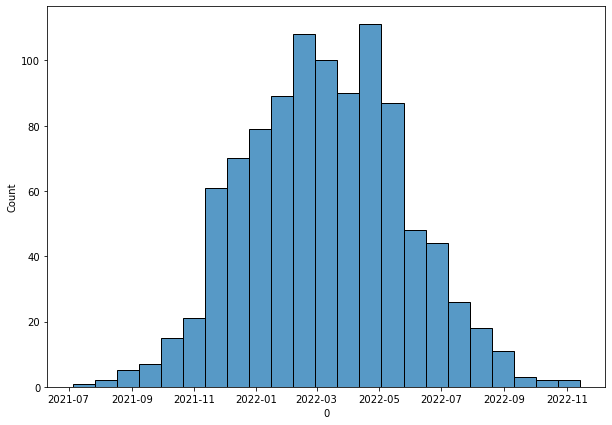

In [965]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df[0], ax=ax)

In [966]:
lista_andares[1]

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo,Andar,torre
1971,795,4,Yes,FUNDOS DE QUADROS ELÉTRICOS - 7 ANDAR,Empresa 2,3.0,2021-03-09,2021-03-11,2021-12-14,2021-12-16,1.0,NaT,NaT,NaN,2022-01-01,7,A
1594,829,4,Yes,POSICIONAMENTO E CHUMBAMENTO DE CONTRAMARCOS -...,Empresa 9,2.0,2021-03-12,2021-03-18,2021-12-29,2021-12-30,1.0,NaT,NaT,NaN,2021-12-01,7,A
1973,863,4,Yes,DISTRIBUIÇÃO HIDRÁULICA EM PAREDES - 7 ANDAR,Empresa 2,3.0,2021-03-19,2021-03-23,2021-12-28,2021-12-30,1.0,NaT,NaT,NaN,2022-01-01,7,A
2336,931,4,Yes,INFRAESTRUTURA DE AR CONDICIONADO - 7 ANDAR,NaN,3.0,2021-03-29,2021-03-31,2022-02-23,2022-02-25,NaN,2022-02-23,2022-02-25,NaN,2022-02-01,7,A
1980,965,4,Yes,INFRAESTRUTURA DE EXAUSTÃO - 7 ANDAR,NaN,3.0,2021-03-29,2021-03-31,2022-01-06,2022-01-10,1.0,NaT,NaT,NaN,2022-01-01,7,A
1606,999,4,Yes,FIAÇÃO ELÉTRICA E ARAME GUIA DE TELEFONIA - 7 ...,Empresa 2,4.0,2021-04-01,2021-04-08,2021-12-17,2021-12-22,1.0,NaT,NaT,NaN,2021-12-01,7,A
1985,1033,4,Yes,FIAÇÃO DE TELEFONIA - 7 ANDAR,Empresa 2,2.0,2021-04-09,2021-04-12,2021-12-30,2022-01-03,NaN,NaT,NaT,NaN,2022-01-01,7,A
5308,2026,4,Yes,BANCAS DE PEDRA COM REJUNTAMENTO - 7 ANDAR,Empresa 19,5.0,2022-10-28,2022-11-03,2022-08-31,2022-09-06,1.0,NaT,NaT,NaN,2022-09-01,7,A
5310,2060,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 7 ANDAR,Empresa 17,5.0,2022-11-04,2022-11-10,2022-08-17,2022-08-23,1.0,NaT,NaT,NaN,2022-09-01,7,A
5312,2094,4,Yes,COLOCAÇÃO DE PORTA DE ENTRADA - 7 ANDAR,Empresa 20,2.0,2022-11-16,2022-11-22,2022-08-24,2022-08-25,1.0,NaT,NaT,NaN,2022-09-01,7,A


<AxesSubplot:xlabel='0', ylabel='Count'>

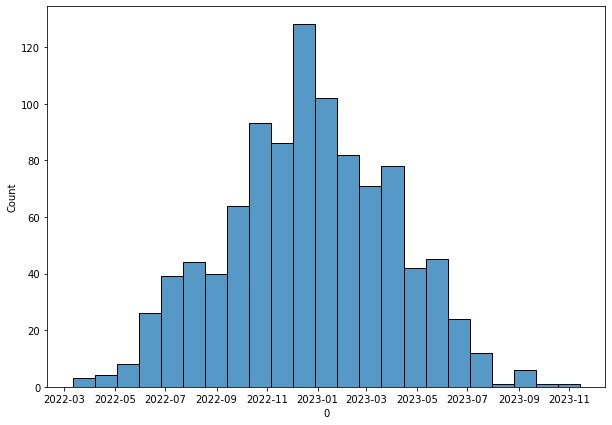

In [967]:
data_final_andar_df = pd.DataFrame(monte_carlo_andar(lista_andares[15].dropna(subset=['Dur']).reset_index(), 1000))
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df[0], ax=ax)

In [968]:
lista_andares[15]

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo,Andar,torre
13,491,4,Yes,PRUMADAS HIDRO-SANITÁRIAS - 21 ANDAR,Empresa 2,3.0,2021-04-28,2021-04-30,2021-06-15,2021-06-17,1.0,NaT,NaT,NaN,2021-07-01,21,A
17,525,4,Yes,CHUMBAMENTO DE PRUMADAS - 21 ANDAR,Empresa 2,2.0,2021-04-29,2021-04-30,2021-06-16,2021-06-17,1.0,NaT,NaT,NaN,2021-07-01,21,A
21,559,4,Yes,MARCAÇÃO TOTAL DA ALVENARIA - 21 ANDAR,Empresa 3,4.0,2021-05-03,2021-05-06,2021-06-10,2021-06-15,1.0,NaT,NaT,NaN,2021-07-01,21,A
27,593,4,Yes,ELEVAÇÃO TOTAL DA ALVENARIA - 21 ANDAR,Empresa 3,5.0,2021-05-13,2021-05-19,2021-06-21,2021-06-25,1.0,NaT,NaT,NaN,2021-07-01,21,A
32,661,4,Yes,DISTRIBUIÇÃO HIDRÁULICA DE TETO - 21 ANDAR,Empresa 2,2.0,2021-05-26,2021-05-31,2021-06-28,2021-06-29,1.0,NaT,NaT,NaN,2021-07-01,21,A
137,695,4,Yes,CONTRAPISO NAS ÁREAS SECAS (incluso cozinha) -...,Empresa 4,5.0,2021-06-02,2021-06-09,2021-07-15,2021-07-21,1.0,NaT,NaT,NaN,2021-08-01,21,A
143,729,4,Yes,PONTOS E FAIXAS - ÁREAS SECAS - 21 ANDAR,Empresa 8,3.0,2021-06-10,2021-06-14,2021-07-22,2021-07-26,1.0,NaT,NaT,NaN,2021-08-01,21,A
149,763,4,Yes,PONTOS E FAIXAS - ÁREAS ÚMIDAS - 21 ANDAR,Empresa 3,3.0,2021-06-15,2021-06-17,2021-07-27,2021-07-29,1.0,NaT,NaT,NaN,2021-08-01,21,A
154,797,4,Yes,FUNDOS DE QUADROS ELÉTRICOS - 21 ANDAR,Empresa 2,3.0,2021-06-18,2021-06-22,2021-07-30,2021-08-03,1.0,NaT,NaT,NaN,2021-08-01,21,A
158,831,4,Yes,POSICIONAMENTO E CHUMBAMENTO DE CONTRAMARCOS -...,Empresa 9,3.0,2021-06-23,2021-06-29,2021-08-04,2021-08-06,1.0,NaT,NaT,NaN,2021-08-01,21,A


<AxesSubplot:xlabel='0', ylabel='Count'>

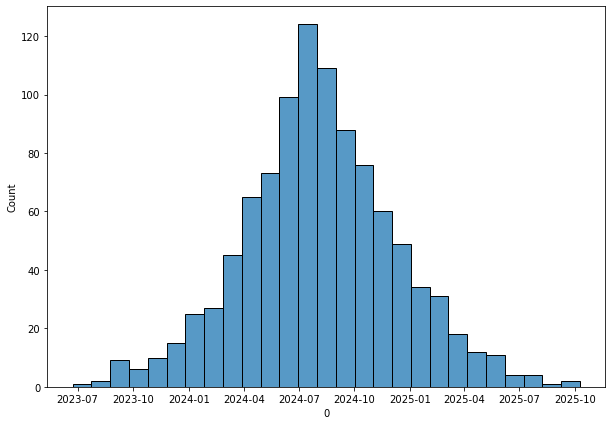

In [969]:
data_final_andar_df = pd.DataFrame(monte_carlo_andar(lista_andares[31].dropna(subset=['Dur']).reset_index(), 1000))
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df[0], ax=ax)

In [970]:
lista_andares[31]

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo,Andar,torre
82,179,4,Yes,ESTRUTURA DA TORRE TIPO - 37 ANDAR,Empresa 1,6.0,2021-07-03,2021-07-09,2021-08-10,2021-08-16,1.0,NaT,NaT,NaN,2021-08-01,37,A
88,223,4,Yes,INSTALAÇÃO ELÉTRICA EMBUTIDA NA ESTRUTURA - 37...,Empresa 2,2.0,2021-07-08,2021-07-09,2021-08-14,2021-08-16,1.0,NaT,NaT,NaN,2021-08-01,37,A
946,278,4,Yes,RETIRADA DO REESCORAMENTO E LIMPEZA DA ESTRUTU...,NaN,3.0,2021-08-19,2021-08-21,2021-10-21,2021-10-23,1.0,NaT,NaT,NaN,2021-11-01,37,A
704,519,4,Yes,PRUMADAS HIDRO-SANITÁRIAS - 37 ANDAR,Empresa 2,3.0,2021-09-03,2021-09-08,2021-10-06,2021-10-09,1.0,NaT,NaT,NaN,2021-10-01,37,A
706,553,4,Yes,CHUMBAMENTO DE PRUMADAS - 37 ANDAR,Empresa 2,2.0,2021-09-06,2021-09-08,2021-10-07,2021-10-09,1.0,NaT,NaT,NaN,2021-10-01,37,A
984,587,4,Yes,MARCAÇÃO TOTAL DA ALVENARIA - 37 ANDAR,Empresa 3,4.0,2021-09-09,2021-09-14,2021-10-11,2021-10-15,1.0,NaT,NaT,NaN,2021-11-01,37,A
1581,621,4,Yes,ELEVAÇÃO TOTAL DA ALVENARIA - 37 ANDAR,Empresa 3,5.0,2021-09-15,2021-09-21,2021-12-07,2021-12-13,1.0,NaT,NaT,NaN,2021-12-01,37,A
1584,655,4,Yes,CHUMBAMENTO DE CAIXAS ELÉTRICAS - 37 ANDAR,Empresa 2,4.0,2021-09-22,2021-09-27,2021-12-14,2021-12-17,1.0,NaT,NaT,NaN,2021-12-01,37,A
1967,723,4,Yes,CONTRAPISO NAS ÁREAS SECAS (incluso cozinha) -...,Empresa 4,5.0,2021-10-04,2021-10-08,2021-12-14,2021-12-20,1.0,NaT,NaT,NaN,2022-01-01,37,A
1970,791,4,Yes,PONTOS E FAIXAS - ÁREAS ÚMIDAS - 37 ANDAR,Empresa 3,3.0,2021-10-15,2021-10-19,2021-12-16,2021-12-20,1.0,NaT,NaT,NaN,2022-01-01,37,A


## ANALISE DO PRIMEIRO MODELO

O primeiro modelo não consegue simular toda a obra, pois considera que, para iniciar uma atividade, deve-se acabar a atividade anterior. Mas, para um andar ou para uma atividade, o modelo funciona bem ao estimar a data final, desde que essas sequencias de atividades possuam relação de término-início.

## TESTANDO MODELO PARA ATIVIDADES

É intuitivo pensar que as atividades possuam diferentes médias de atrasos. Dessa forma, iremos coletar a media de atrasos e usar o modelo para simular a data final de únicas atividades de diversos pavimentos. Com isso, o objetivo é ter uma estimativa da data final para uma determinada atividade.

### Aplicabilidade

Tendo em vista que, durante o planejamento dos serviços de uma obra, diversas vezes precisamos estimar a data de início de uma atividade a partir do término de uma predecessora. A simulação feita por esse modelo pode ser usada como base para prever a data mais provavel para início de uma determinada atividade ou como um indicativo de que uma atividade possa atrasar e, consequentemente, deva-se tomar algumas medidas para mitigar esse atraso.

In [971]:
atualizacao_andar.groupby(by='Atividade').count().sort_values(by='Critical', ascending=False).head(10)

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,...,ordem_ativ,fim_predecessora,fim_predecessora.1,atraso_inicio,atraso_inicio.1,atraso_inicio.2,e_atraso_inicio,dur.1,e_atraso_dur,atraso_dur
Atividade,,,,,,,,,,,,,,,,,,,,,
FORRO E SANCAS DE GESSO,112,112,112,112,112,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112
CONTRAPISO EM HALL DE SERVIÇO,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91
BANCAS DE PEDRA COM REJUNTAMENTO,67,67,67,67,14,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
MONTAGEM DE BUSWAY,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
PISO CERÂMICO E RODAPÉ DE HALL,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
MASSA PVA/ 1ª DEMÃO DE PINTURA,60,60,60,60,45,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
CONTRAPISO NAS ÁREAS SECAS (incluso cozinha),60,60,60,60,60,60,60,60,60,60,...,0,60,60,60,60,60,60,60,60,60
ELEVAÇÃO TOTAL DA ALVENARIA,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
GESSO EM ÁREAS SECAS E TETO,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


In [972]:
fig = px.timeline(df_pintura.sort_values(by='Início.1'), x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

In [1086]:
data_inicio = pd.to_datetime('2021-10-13', format='%Y-%m-%d')

In [1092]:
lista_ativ[41] = lista_ativ[41].sort_values(by='Início.1')
lista_ativ[41]['fim_predecessora'] = lista_ativ[41]['Fim'].shift(1).fillna(data_inicio)
lista_ativ[41]['fim_predecessora.1'] = lista_ativ[41]['Fim.1'].shift(1).fillna(data_inicio)
lista_ativ[41]['atraso_inicio'] = np.busday_count(lista_ativ[41]['fim_predecessora'].values.astype('datetime64[D]'), lista_ativ[41]['Início'].values.astype('datetime64[D]'))
lista_ativ[41]['atraso_inicio.1'] = np.busday_count(lista_ativ[41]['fim_predecessora.1'].values.astype('datetime64[D]'), lista_ativ[41]['Início.1'].values.astype('datetime64[D]'))
lista_ativ[41]['atraso_inicio.2'] = lista_ativ[41]['atraso_inicio.1'] - lista_ativ[41]['atraso_inicio']
lista_ativ[41]['e_atraso_inicio'] = 0
mask_e_atraso = lista_ativ[41]['atraso_inicio.1'] > 1
lista_ativ[41].loc[mask_e_atraso, 'e_atraso_inicio'] = 1
#df.loc[~mask_e_atraso, 'e_atraso_inicio'] = 0
lista_ativ[41]['dur.1'] = np.busday_count(lista_ativ[41]['Início.1'].values.astype('datetime64[D]'), lista_ativ[41]['Fim.1'].values.astype('datetime64[D]'))
lista_ativ[41]['e_atraso_dur'] = 0
mask_e_atraso_dur = lista_ativ[41]['Dur'] < lista_ativ[41]['dur.1']
lista_ativ[41].loc[mask_e_atraso_dur, 'e_atraso_dur'] = 1
#df.loc[~mask_e_atraso_dur, 'e_atraso_dur'] = 0
lista_ativ[41]['atraso_dur'] = lista_ativ[41]['dur.1'] - lista_ativ[41]['Dur']
lista_ativ[41]

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,...,torre,fim_predecessora,fim_predecessora.1,atraso_inicio,atraso_inicio.1,atraso_inicio.2,e_atraso_inicio,dur.1,e_atraso_dur,atraso_dur
1163,2059,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 8 ANDAR,NaN,5.0,2022-10-28,2022-11-03,2021-10-13,2021-10-19,...,A,2021-10-13,2021-10-13,272,0,-272,0,4,0,-1.0
1677,2058,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 9 ANDAR,NaN,5.0,2022-10-21,2022-10-27,2021-11-22,2021-11-26,...,A,2022-11-03,2021-10-19,-9,24,33,1,4,0,-1.0
1676,2057,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 10 ANDAR,NaN,5.0,2022-10-14,2022-10-20,2021-11-29,2021-12-03,...,A,2022-10-27,2021-11-26,-9,1,10,0,4,0,-1.0
1675,2056,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 11 ANDAR,NaN,5.0,2022-10-07,2022-10-13,2021-12-06,2021-12-10,...,A,2022-10-20,2021-12-03,-9,1,10,0,4,0,-1.0
2049,2055,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 12 ANDAR,NaN,5.0,2022-09-30,2022-10-06,2021-12-16,2021-12-22,...,A,2022-10-13,2021-12-10,-9,4,13,1,4,0,-1.0
1674,2054,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 13 ANDAR,NaN,5.0,2022-09-23,2022-09-29,2021-12-20,2021-12-27,...,A,2022-10-06,2021-12-22,-9,-2,7,0,5,0,0.0
2048,2053,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 14 ANDAR,NaN,5.0,2022-09-16,2022-09-22,2021-12-23,2021-12-30,...,A,2022-09-29,2021-12-27,-9,-2,7,0,5,0,0.0
2047,2052,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 15 ANDAR,NaN,5.0,2022-09-09,2022-09-15,2022-01-03,2022-01-07,...,A,2022-09-22,2021-12-30,-9,2,11,1,4,0,-1.0
2449,2051,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 16 ANDAR,NaN,5.0,2022-09-02,2022-09-08,2022-01-20,2022-01-26,...,A,2022-09-15,2022-01-07,-9,9,18,1,4,0,-1.0
2448,2050,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 17 ANDAR,NaN,5.0,2022-08-26,2022-09-01,2022-01-27,2022-02-02,...,A,2022-09-08,2022-01-26,-9,1,10,0,4,0,-1.0


In [1104]:
import scipy as sp
import pandas.tseries.offsets as ts
import random

def preenchimento_automatico(df, data_inicio):
    '''
    Esta função recebe um dataframe e uma data de início e retorna um dataframe com as colunas de datas de início e término sem atrasos.

    O dataframe de entrada deve conter uma coluna com a duração de cada atividade em números inteiros.
    '''
    for ativ in range(0, len(df)):
        if ativ == 0:
            df.loc[ativ, 'Início'] = data_inicio
            df.loc[ativ, 'Fim'] = df.loc[ativ, 'Início'] + ts.BDay(int(df.loc[ativ, 'Dur']))
        else:
            df.loc[ativ, 'Início'] = df[ativ-1, 'Fim'] + ts.BDay(1)
            df.loc[ativ, 'Fim'] = df.loc[ativ, 'Início'] + ts.BDay(int(df.loc[ativ, 'Dur']))
        return df

def treinamento(df, atividade):
    '''
    Esta função irá retornar a média de atraso de início e a média de atraso de duração de uma determinada atividade.
    Funciona como um treinamento de um modelo de ML.

    Esta função deve receber um DataFrame com as colunas:
        Descrição dos serviços;
        Início.1 (data de início real);
        Fim.1 (data de término real);
        Dur (duração da atividade em números inteiros)

    A função precisa receber um nome de atividade que apareça na coluna Descrição dos seviços e tabém uma data de início no formado YYYY-MM-DD.
    '''
    # TRANSFORMANDO DATA DE INÍCIO
    data_inicio = df['Início'].min()

    # FILTRANDO ATIVIDADE ESCOLHIDA
    mask_ativ = df['Descrição dos Serviços'].str.contains(atividade)
    df = df[mask_ativ]

    # ORDENANDO VALORES POR DATA DE INÍCIO REAL
    df = df.sort_values(by='Início.1').reset_index()

    # PREENCHENDO COLUNAS DE INÍCIO E TÉRMINO PROGRAMADAS
    df = preenchimento_automatico(df, data_inicio)

    #teste_inicio_real = df['Início.1']
    #print(f'Data início real: {teste_inicio_real}')

    # CALCULANDO ATRASOS
    df['fim_predecessora'] = df['Fim'].shift(1).fillna(data_inicio)
    df['fim_predecessora.1'] = df['Fim.1'].shift(1).fillna(data_inicio)
    df['atraso_inicio'] = np.busday_count(df['fim_predecessora'].values.astype('datetime64[D]'), df['Início'].values.astype('datetime64[D]'))
    df['atraso_inicio.1'] = np.busday_count(df['fim_predecessora.1'].values.astype('datetime64[D]'), df['Início.1'].values.astype('datetime64[D]'))
    df['atraso_inicio.2'] = df['atraso_inicio.1'] - df['atraso_inicio']
    df['e_atraso_inicio'] = 0
    #mask_e_atraso = df['atraso_inicio'] < df['atraso_inicio.1']
    mask_e_atraso = df['atraso_inicio.1'] > 1
    df.loc[mask_e_atraso, 'e_atraso_inicio'] = 1
    #df.loc[~mask_e_atraso, 'e_atraso_inicio'] = 0
    df['dur.1'] = np.busday_count(df['Início.1'].values.astype('datetime64[D]'), df['Fim.1'].values.astype('datetime64[D]'))
    df['e_atraso_dur'] = 0
    mask_e_atraso_dur = df['Dur'] < df['dur.1']
    df.loc[mask_e_atraso_dur, 'e_atraso_dur'] = 1
    #df.loc[~mask_e_atraso_dur, 'e_atraso_dur'] = 0
    df['atraso_dur'] = df['dur.1'] - df['Dur']

    #teste = df.loc[0,'atraso_inicio']
    #print(f'Atraso início: {teste}')

    # CALCULANDO ESTATÍSTICAS
    df_stats = df.describe().T
    mask_atraso_maior = df['atraso_inicio.2'] >= 0
    mask_atraso_maior_dur = df['atraso_dur'] >= 0
    df_stats_maior = df[mask_atraso_maior].describe().T
    df_stats_maior_dur  = df[mask_atraso_maior_dur].describe().T
    PROB_ATRASO_INICIO = df_stats.loc['e_atraso_inicio', 'mean']
    PROB_ATRASO_DUR = df_stats.loc['e_atraso_dur', 'mean']
    #MEDIA_ATRASO_INICIO = df_stats_maior.loc['atraso_inicio.2', 'mean']
    MEDIA_ATRASO_INICIO = df_stats.loc['atraso_inicio.1', 'mean']
    #MEDIA_ATRASO_DUR = df_stats_maior_dur.loc['atraso_dur', 'mean']
    MEDIA_ATRASO_DUR = df_stats.loc['atraso_dur', 'mean']

    print(f'PROB_ATRASO_INICIO: {PROB_ATRASO_INICIO}; PROB_ATRASO_DUR: {PROB_ATRASO_DUR}; MEDIA_ATRASO_INICIO: {MEDIA_ATRASO_INICIO}; MEDIA_ATRASO_DUR: {MEDIA_ATRASO_DUR}')

    return PROB_ATRASO_INICIO, PROB_ATRASO_DUR, MEDIA_ATRASO_INICIO, MEDIA_ATRASO_DUR



def simular_atividade(df_train, df_test, atividade, data_inicio):
    '''
    Esta função recebe 4 argumentos: um dataframe de treinamento, um dataframe de teste, o nome do serviço que será analisado e a data de início prevista para esse serviço

    O dataframe de treinamento deve conter as colunas:
        Descrição dos serviços;
        Início.1 (data de início real);
        Fim.1 (data de término real);
        Dur (duração da atividade em números inteiros)

    O dataframe de teste deve conter as colunas abaixo e estar ordenado pelos andares que irão começar primeiro:
        Descrição dos serviços;
        Dur (duração da atividade em números inteiros)
    
    A funçao irá retornar a data final da última atividade do dataframe de teste.
    '''

    # FILTRANDO ATIVIDADE ESCOLHIDA
    mask_ativ_test = (df_test['Descrição dos Serviços'].str.contains(atividade))
    df_test = df_test[mask_ativ_test]
    mask_ativ_train = (df_train['Descrição dos Serviços'].str.contains(atividade))
    df_train = df_train[mask_ativ_train]

    #print(df_train['atraso_dur'].mean())
    
    data_inicio = pd.to_datetime(data_inicio, format='%Y-%m-%d')

    PROB_ATRASO_INICIO, PROB_ATRASO_DUR, MEDIA_ATRASO_INICIO, MEDIA_ATRASO_DUR = treinamento(df = df_train, atividade=atividade)
    #print(f'PROB_ATRASO_INICIO: {PROB_ATRASO_INICIO}; PROB_ATRASO_DUR: {PROB_ATRASO_DUR}; MEDIA_ATRASO_INICIO: {MEDIA_ATRASO_INICIO}; MEDIA_ATRASO_DUR: {MEDIA_ATRASO_DUR}')

    df_test = df_test.reset_index()

    df_test['Início_simul'] = 0
    df_test['Fim_simul'] = 0
    df_test['atraso_inicio_simul'] = 0
    df_test['dur_simul'] = 0

    #print(f'train: {len(df_train)}')
    #print(f'test: {len(df_test)}')

    for atividade in range(0, len(df_test)):
        if atividade == 0:
            if random.random() < PROB_ATRASO_INICIO:
                atraso_inicio = ts.BDay(sp.stats.poisson(MEDIA_ATRASO_INICIO).rvs(1))
                df_test.loc[atividade,'atraso_inicio_simul'] = atraso_inicio
                df_test.loc[atividade,'Início_simul'] = data_inicio + atraso_inicio
            else:
                df_test.loc[atividade,'Início_simul'] = data_inicio
            
            if random.random() < PROB_ATRASO_DUR:
                atraso_dur = ts.BDay(sp.stats.poisson(MEDIA_ATRASO_DUR).rvs(1)+df_test.loc[atividade,'Dur'])
                df_test.loc[atividade,'dur_simul'] = atraso_dur
                df_test.loc[atividade,'Fim_simul'] = df_test.loc[atividade, 'Início_simul'] + atraso_dur
            else:
                atraso_dur = ts.BDay(df_test.loc[atividade,'Dur'])
                df_test.loc[atividade,'Fim_simul'] = df_test.loc[atividade, 'Início_simul'] + atraso_dur
        else:
            if random.random() < PROB_ATRASO_INICIO:
                atraso_inicio = ts.BDay(sp.stats.poisson(MEDIA_ATRASO_INICIO).rvs(1))
                df_test.loc[atividade,'atraso_inicio_simul'] = atraso_inicio
                #print(df.loc[atividade, :])
                df_test.loc[atividade,'Início_simul'] = df_test.loc[atividade-1, 'Fim_simul'] + atraso_inicio
            else:
                df_test.loc[atividade,'Início_simul'] = df_test.loc[atividade-1, 'Fim_simul']
            
            if random.random() < PROB_ATRASO_DUR:
                atraso_dur = ts.BDay(sp.stats.poisson(MEDIA_ATRASO_DUR).rvs(1)+int(df_test.loc[atividade,'Dur']))
                df_test.loc[atividade,'dur_simul'] = atraso_dur
                df_test.loc[atividade,'Fim_simul'] = df_test.loc[atividade, 'Início_simul'] + atraso_dur
            else:
                #print(atividade)
                #print(dataframe1.loc[atividade,'Dur'])
                atraso_dur = ts.BDay(int(df_test.loc[atividade,'Dur']))
                df_test.loc[atividade,'Fim_simul'] = df_test.loc[atividade, 'Início_simul'] + atraso_dur
    return df_test.tail(1)['Fim_simul'].values

def monte_carlo_ativ(df_train, df_test, atividade, data_inicio, num_iter):
    '''
    Esta função recebe 5 argumentos: um dataframe de treinamento, um dataframe de teste, o nome do serviço que será analisado, a data de início prevista para esse serviço e o número de vezes que as atividades serão simuladas.

    A função irá retornar um array com a data final da última atividade do dataframe de teste simulado n vezes.
    '''
    return [simular_atividade(df_train, df_test, atividade, data_inicio) for i in range(0, num_iter)]

In [1105]:
df_train = atualizacao_andar[mask_torre_a]
df_test = atualizacao_andar[mask_torre_b]
simular_atividade(df_train=df_test, df_test=df_train, atividade='MASSA PVA/', data_inicio='2021-10-13')

PROB_ATRASO_INICIO: 0.2571428571428571; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: -0.4; MEDIA_ATRASO_DUR: -0.9714285714285714


C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/85912855.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\mathe\AppData\Local\Temp/ipykernel_7448/85912855.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



ValueError: Domain error in arguments.

PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.

<AxesSubplot:xlabel='0', ylabel='Count'>

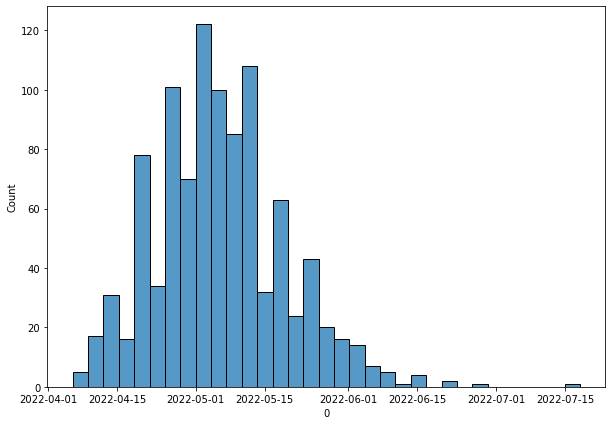

In [1106]:
data_final_andar_df = pd.DataFrame(monte_carlo_ativ(df_train=df_train, df_test=df_train, atividade='ELEVAÇÃO TOTAL DA ALVENARIA', data_inicio='2021-10-13', num_iter=1000))
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df[0], ax=ax)

In [1098]:
fig = px.timeline(df_pintura.sort_values(by='Início.1'), x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

<AxesSubplot:xlabel='0', ylabel='Count'>

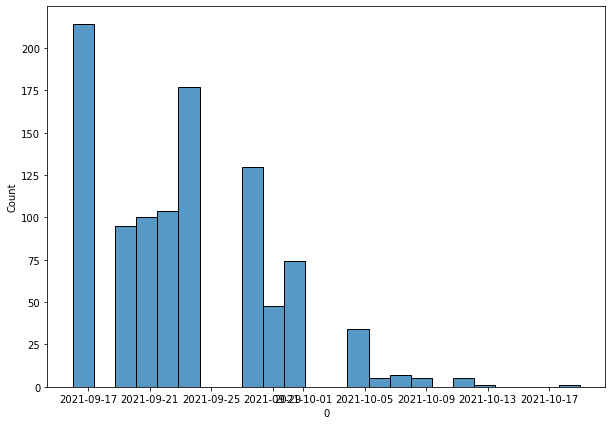

In [1059]:
data_final_andar_df = pd.DataFrame(monte_carlo_ativ(df_train=df_train, df_test=df_train, atividade='ESTRUTURA DA TORRE TIPO', data_inicio='2021-06-15', num_iter=1000))
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df[0], ax=ax)

In [1058]:
fig = px.timeline(lista_ativ[0].sort_values(by='Início.1'), x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

PROB_ATRASO_INICIO: 0.20833333333333334; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 2.0588235294117645; MEDIA_ATRASO_DUR: 0.0
PROB_ATRASO_INICIO: 0.20833333333333334; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 2.0588235294117645; MEDIA_ATRASO_DUR: 0.0
PROB_ATRASO_INICIO: 0.20833333333333334; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 2.0588235294117645; MEDIA_ATRASO_DUR: 0.0
PROB_ATRASO_INICIO: 0.20833333333333334; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 2.0588235294117645; MEDIA_ATRASO_DUR: 0.0
PROB_ATRASO_INICIO: 0.20833333333333334; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 2.0588235294117645; MEDIA_ATRASO_DUR: 0.0
PROB_ATRASO_INICIO: 0.20833333333333334; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 2.0588235294117645; MEDIA_ATRASO_DUR: 0.0
PROB_ATRASO_INICIO: 0.20833333333333334; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 2.0588235294117645; MEDIA_ATRASO_DUR: 0.0
PROB_ATRASO_INICIO: 0.20833333333333334; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 2.0588235294117645; MEDIA_ATRASO_D

<AxesSubplot:xlabel='0', ylabel='Count'>

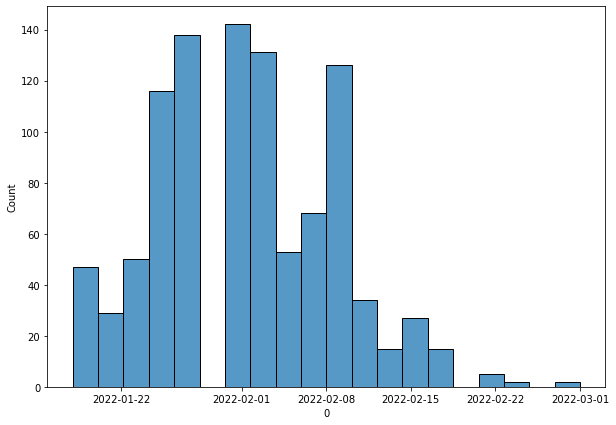

In [987]:
data_final_andar_df = pd.DataFrame(monte_carlo_ativ(df_train=df_test, df_test=df_test, atividade='ESTRUTURA DA TORRE TIPO', data_inicio='2021-06-25', num_iter=1000))
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df[0], ax=ax)

In [991]:
data_final_andar_df.mode()

,0
0,2022-01-31


In [986]:
mask_ativ_test = (atualizacao_torre_b['Descrição dos Serviços'].str.contains('ESTRUTURA DA TORRE TIPO'))
atualizacao_torre_b[mask_ativ_test].sort_values(by='Início')

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo,Andar,torre
60,5704,4,Yes,ESTRUTURA DA TORRE TIPO - 16 ANDAR,Empresa 7,6.0,2021-05-15,2021-05-21,2021-06-25,2021-06-30,1.0,2021-06-25,2021-06-30,Concreto não deu pega. 2 dias de atraso,2021-07-01,16,B
242,5706,4,Yes,ESTRUTURA DA TORRE TIPO - 18 ANDAR,Empresa 7,7.0,2021-05-29,2021-06-04,2021-07-10,2021-07-16,1.0,2021-07-10,2021-07-16,NaN,2021-08-01,18,B
243,5707,4,Yes,ESTRUTURA DA TORRE TIPO - 19 ANDAR,Empresa 7,6.0,2021-06-05,2021-06-11,2021-07-17,2021-07-23,1.0,2021-07-17,2021-07-23,NaN,2021-08-01,19,B
244,5708,4,Yes,ESTRUTURA DA TORRE TIPO - 20 ANDAR,Empresa 7,6.0,2021-06-12,2021-06-18,2021-07-24,2021-07-30,1.0,2021-07-24,2021-07-30,NaN,2021-08-01,20,B
245,5709,4,Yes,ESTRUTURA DA TORRE TIPO - 21 ANDAR,Empresa 7,6.0,2021-06-19,2021-06-25,2021-07-31,2021-08-07,1.0,2021-07-31,2021-08-07,NaN,2021-08-01,21,B
561,5711,4,Yes,ESTRUTURA DA TORRE TIPO - 23 ANDAR,Empresa 7,7.0,2021-07-03,2021-07-09,2021-08-14,2021-08-21,1.0,2021-08-14,2021-08-21,NaN,2021-09-01,23,B
562,5712,4,Yes,ESTRUTURA DA TORRE TIPO - 24 ANDAR,Empresa 7,6.0,2021-07-10,2021-07-16,2021-08-23,2021-08-28,1.0,2021-08-23,2021-08-28,NaN,2021-09-01,24,B
563,5713,4,Yes,ESTRUTURA DA TORRE TIPO - 25 ANDAR,Empresa 7,6.0,2021-07-17,2021-07-23,2021-08-30,2021-09-04,1.0,2021-08-30,2021-09-04,NaN,2021-09-01,25,B
564,5714,4,Yes,ESTRUTURA DA TORRE TIPO - 26 ANDAR,Empresa 7,6.0,2021-07-24,2021-07-30,2021-09-06,2021-09-14,1.0,2021-09-06,2021-09-14,NaN,2021-09-01,26,B
565,5715,4,Yes,ESTRUTURA DA TORRE TIPO - 27 ANDAR,Empresa 7,6.0,2021-07-31,2021-08-06,2021-09-15,2021-09-20,NaN,2021-09-15,2021-09-20,NaN,2021-09-01,27,B


In [1113]:
import scipy as sp
import pandas.tseries.offsets as ts
import random

def preenchimento_automatico(df, data_inicio):
    '''
    Esta função recebe um dataframe e uma data de início e retorna um dataframe com as colunas de datas de início e término sem atrasos.

    O dataframe de entrada deve conter uma coluna com a duração de cada atividade em números inteiros.
    '''
    for ativ in range(0, len(df)):
        if ativ == 0:
            df.loc[ativ, 'Início'] = data_inicio
            df.loc[ativ, 'Fim'] = df.loc[ativ, 'Início'] + ts.BDay(int(df.loc[ativ, 'Dur']))
        else:
            df.loc[ativ, 'Início'] = df[ativ-1, 'Fim'] + ts.BDay(1)
            df.loc[ativ, 'Fim'] = df.loc[ativ, 'Início'] + ts.BDay(int(df.loc[ativ, 'Dur']))
        return df

def treinamento_normal(df, atividade):
    '''
    Esta função irá retornar a média de atraso de início e a média de atraso de duração de uma determinada atividade.
    Funciona como um treinamento de um modelo de ML.

    Esta função deve receber um DataFrame com as colunas:
        Descrição dos serviços;
        Início.1 (data de início real);
        Fim.1 (data de término real);
        Dur (duração da atividade em números inteiros)

    A função precisa receber um nome de atividade que apareça na coluna Descrição dos seviços e tabém uma data de início no formado YYYY-MM-DD.
    '''
    # TRANSFORMANDO DATA DE INÍCIO
    data_inicio = df['Início'].min()

    # FILTRANDO ATIVIDADE ESCOLHIDA
    mask_ativ = df['Descrição dos Serviços'].str.contains(atividade)
    df = df[mask_ativ]

    # ORDENANDO VALORES POR DATA DE INÍCIO REAL
    df = df.sort_values(by='Início.1').reset_index()

    # PREENCHENDO COLUNAS DE INÍCIO E TÉRMINO PROGRAMADAS
    df = preenchimento_automatico(df, data_inicio)

    #teste_inicio_real = df['Início.1']
    #print(f'Data início real: {teste_inicio_real}')

    # CALCULANDO ATRASOS
    df['fim_predecessora'] = df['Fim'].shift(1).fillna(data_inicio)
    df['fim_predecessora.1'] = df['Fim.1'].shift(1).fillna(data_inicio)
    df['atraso_inicio'] = np.busday_count(df['fim_predecessora'].values.astype('datetime64[D]'), df['Início'].values.astype('datetime64[D]'))
    df['atraso_inicio.1'] = np.busday_count(df['fim_predecessora.1'].values.astype('datetime64[D]'), df['Início.1'].values.astype('datetime64[D]'))
    df['atraso_inicio.2'] = df['atraso_inicio.1'] - df['atraso_inicio']
    df['e_atraso_inicio'] = 0
    #mask_e_atraso = df['atraso_inicio'] < df['atraso_inicio.1']
    mask_e_atraso = df['atraso_inicio.1'] > 1
    df.loc[mask_e_atraso, 'e_atraso_inicio'] = 1
    #df.loc[~mask_e_atraso, 'e_atraso_inicio'] = 0
    df['dur.1'] = np.busday_count(df['Início.1'].values.astype('datetime64[D]'), df['Fim.1'].values.astype('datetime64[D]'))
    df['e_atraso_dur'] = 0
    mask_e_atraso_dur = df['Dur'] < df['dur.1']
    df.loc[mask_e_atraso_dur, 'e_atraso_dur'] = 1
    #df.loc[~mask_e_atraso_dur, 'e_atraso_dur'] = 0
    df['atraso_dur'] = df['dur.1'] - df['Dur']

    #teste = df.loc[0,'atraso_inicio']
    #print(f'Atraso início: {teste}')

    # CALCULANDO ESTATÍSTICAS
    df_stats = df.describe().T
    #mask_atraso_maior = df['atraso_inicio.2'] >= 0
    #mask_atraso_maior_dur = df['atraso_dur'] >= 0
    #df_stats_maior = df[mask_atraso_maior].describe().T
    #df_stats_maior_dur  = df[mask_atraso_maior_dur].describe().T
    PROB_ATRASO_INICIO = df_stats.loc['e_atraso_inicio', 'mean']
    PROB_ATRASO_DUR = df_stats.loc['e_atraso_dur', 'mean']
    #MEDIA_ATRASO_INICIO = df_stats_maior.loc['atraso_inicio.2', 'mean']
    MEDIA_ATRASO_INICIO = df_stats.loc['atraso_inicio.1', 'mean']
    #MEDIA_ATRASO_DUR = df_stats_maior_dur.loc['atraso_dur', 'mean']
    MEDIA_ATRASO_DUR = df_stats.loc['atraso_dur', 'mean']
    DESVIO_INICIO = df_stats.loc['atraso_inicio.1', 'std']
    DESVIO_DUR = df_stats.loc['atraso_dur', 'std']

    print(f'PROB_ATRASO_INICIO: {PROB_ATRASO_INICIO}; PROB_ATRASO_DUR: {PROB_ATRASO_DUR}; MEDIA_ATRASO_INICIO: {MEDIA_ATRASO_INICIO}; MEDIA_ATRASO_DUR: {MEDIA_ATRASO_DUR}; DESVIO_INICIO: {DESVIO_INICIO}; DESVIO_DUR: {DESVIO_DUR}')

    return PROB_ATRASO_INICIO, PROB_ATRASO_DUR, MEDIA_ATRASO_INICIO, MEDIA_ATRASO_DUR, DESVIO_INICIO, DESVIO_DUR



def simular_atividade_norm(df_train, df_test, atividade, data_inicio):
    '''
    Esta função recebe 4 argumentos: um dataframe de treinamento, um dataframe de teste, o nome do serviço que será analisado e a data de início prevista para esse serviço

    O dataframe de treinamento deve conter as colunas:
        Descrição dos serviços;
        Início.1 (data de início real);
        Fim.1 (data de término real);
        Dur (duração da atividade em números inteiros)

    O dataframe de teste deve conter as colunas abaixo e estar ordenado pelos andares que irão começar primeiro:
        Descrição dos serviços;
        Dur (duração da atividade em números inteiros)
    
    A funçao irá retornar a data final da última atividade do dataframe de teste.
    '''

    # FILTRANDO ATIVIDADE ESCOLHIDA
    mask_ativ_test = (df_test['Descrição dos Serviços'].str.contains(atividade))
    df_test = df_test[mask_ativ_test]
    mask_ativ_train = (df_train['Descrição dos Serviços'].str.contains(atividade))
    df_train = df_train[mask_ativ_train]

    #print(df_train['atraso_dur'].mean())
    
    data_inicio = pd.to_datetime(data_inicio, format='%Y-%m-%d')

    PROB_ATRASO_INICIO, PROB_ATRASO_DUR, MEDIA_ATRASO_INICIO, MEDIA_ATRASO_DUR, DESVIO_INICIO, DESVIO_DUR = treinamento_normal(df = df_train, atividade=atividade)
    #print(f'PROB_ATRASO_INICIO: {PROB_ATRASO_INICIO}; PROB_ATRASO_DUR: {PROB_ATRASO_DUR}; MEDIA_ATRASO_INICIO: {MEDIA_ATRASO_INICIO}; MEDIA_ATRASO_DUR: {MEDIA_ATRASO_DUR}')

    df_test = df_test.reset_index()

    df_test['Início_simul'] = 0
    df_test['Fim_simul'] = 0
    df_test['atraso_inicio_simul'] = 0
    df_test['dur_simul'] = 0

    #print(f'train: {len(df_train)}')
    #print(f'test: {len(df_test)}')

    for atividade in range(0, len(df_test)):
        if atividade == 0:
            if random.random() < PROB_ATRASO_INICIO:
                atraso_inicio = ts.BDay(int(sp.stats.norm(loc=MEDIA_ATRASO_INICIO, scale=DESVIO_INICIO).rvs(1)))
                df_test.loc[atividade,'atraso_inicio_simul'] = atraso_inicio
                df_test.loc[atividade,'Início_simul'] = data_inicio + atraso_inicio
            else:
                df_test.loc[atividade,'Início_simul'] = data_inicio
            
            if random.random() < PROB_ATRASO_DUR:
                atraso_dur = ts.BDay(int(sp.stats.norm(loc=MEDIA_ATRASO_DUR, scale=DESVIO_DUR).rvs(1)+df_test.loc[atividade,'Dur']))
                df_test.loc[atividade,'dur_simul'] = atraso_dur
                df_test.loc[atividade,'Fim_simul'] = df_test.loc[atividade, 'Início_simul'] + atraso_dur
            else:
                atraso_dur = ts.BDay(df_test.loc[atividade,'Dur'])
                df_test.loc[atividade,'Fim_simul'] = df_test.loc[atividade, 'Início_simul'] + atraso_dur
        else:
            if random.random() < PROB_ATRASO_INICIO:
                atraso_inicio = ts.BDay(int(sp.stats.norm(loc=MEDIA_ATRASO_INICIO, scale=DESVIO_INICIO).rvs(1)))
                df_test.loc[atividade,'atraso_inicio_simul'] = atraso_inicio
                #print(df.loc[atividade, :])
                df_test.loc[atividade,'Início_simul'] = df_test.loc[atividade-1, 'Fim_simul'] + atraso_inicio
            else:
                df_test.loc[atividade,'Início_simul'] = df_test.loc[atividade-1, 'Fim_simul']
            
            if random.random() < PROB_ATRASO_DUR:
                atraso_dur = ts.BDay(int(sp.stats.norm(loc=MEDIA_ATRASO_DUR, scale=DESVIO_DUR).rvs(1)+df_test.loc[atividade,'Dur']))
                df_test.loc[atividade,'dur_simul'] = atraso_dur
                df_test.loc[atividade,'Fim_simul'] = df_test.loc[atividade, 'Início_simul'] + atraso_dur
            else:
                #print(atividade)
                #print(dataframe1.loc[atividade,'Dur'])
                atraso_dur = ts.BDay(int(df_test.loc[atividade,'Dur']))
                df_test.loc[atividade,'Fim_simul'] = df_test.loc[atividade, 'Início_simul'] + atraso_dur
    return df_test.tail(1)['Fim_simul'].values

def monte_carlo_ativ_norm(df_train, df_test, atividade, data_inicio, num_iter):
    '''
    Esta função recebe 5 argumentos: um dataframe de treinamento, um dataframe de teste, o nome do serviço que será analisado, a data de início prevista para esse serviço e o número de vezes que as atividades serão simuladas.

    A função irá retornar um array com a data final da última atividade do dataframe de teste simulado n vezes.
    '''
    return [simular_atividade_norm(df_train, df_test, atividade, data_inicio) for i in range(0, num_iter)]

PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334; DESVIO_INICIO: 8.352297262742592; DESVIO_DUR: 0.46430562148753635
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334; DESVIO_INICIO: 8.352297262742592; DESVIO_DUR: 0.46430562148753635
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334; DESVIO_INICIO: 8.352297262742592; DESVIO_DUR: 0.46430562148753635
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334; DESVIO_INICIO: 8.352297262742592; DESVIO_DUR: 0.46430562148753635
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583333333333334; DESVIO_INICIO: 8.352297262742592; DESVIO_DUR: 0.46430562148753635
PROB_ATRASO_INICIO: 0.25; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 3.75; MEDIA_ATRASO_DUR: -0.9583

<AxesSubplot:xlabel='0', ylabel='Count'>

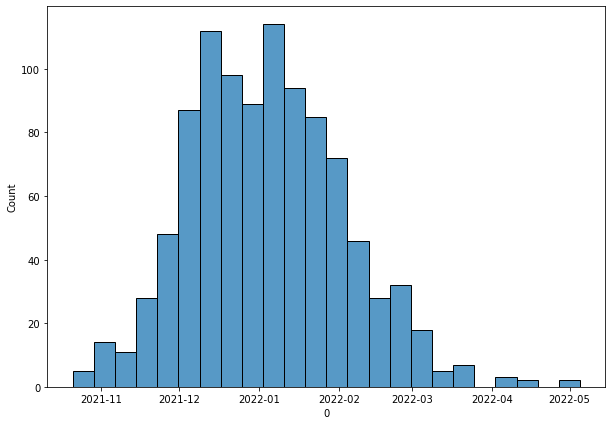

In [1124]:
data_final_andar_df_norm = pd.DataFrame(monte_carlo_ativ_norm(df_train=df_train, df_test=df_train, atividade='ELEVAÇÃO TOTAL DA ALVENARIA', data_inicio='2021-06-14', num_iter=1000))
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df_norm[0], ax=ax)

In [1123]:
fig = px.timeline(lista_ativ[6].sort_values(by='Início.1'), x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

PROB_ATRASO_INICIO: 0.52; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 0.28; MEDIA_ATRASO_DUR: -0.92; DESVIO_INICIO: 24.825255957055777; DESVIO_DUR: 0.2768874620972691
PROB_ATRASO_INICIO: 0.52; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 0.28; MEDIA_ATRASO_DUR: -0.92; DESVIO_INICIO: 24.825255957055777; DESVIO_DUR: 0.2768874620972691
PROB_ATRASO_INICIO: 0.52; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 0.28; MEDIA_ATRASO_DUR: -0.92; DESVIO_INICIO: 24.825255957055777; DESVIO_DUR: 0.2768874620972691
PROB_ATRASO_INICIO: 0.52; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 0.28; MEDIA_ATRASO_DUR: -0.92; DESVIO_INICIO: 24.825255957055777; DESVIO_DUR: 0.2768874620972691
PROB_ATRASO_INICIO: 0.52; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 0.28; MEDIA_ATRASO_DUR: -0.92; DESVIO_INICIO: 24.825255957055777; DESVIO_DUR: 0.2768874620972691
PROB_ATRASO_INICIO: 0.52; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: 0.28; MEDIA_ATRASO_DUR: -0.92; DESVIO_INICIO: 24.825255957055777; DESVIO_DUR: 0.2768874620972691
PROB

<AxesSubplot:xlabel='0', ylabel='Count'>

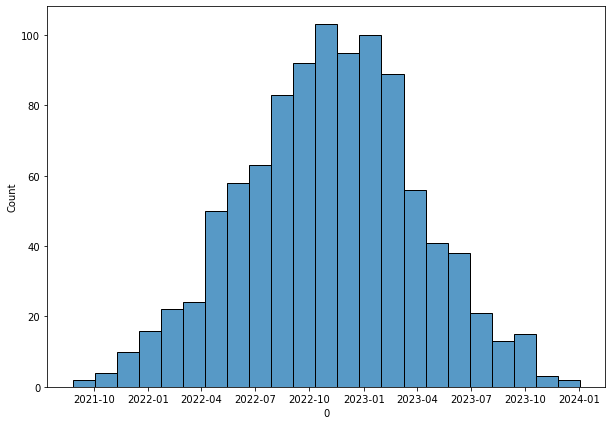

In [1131]:
data_final_andar_df_norm = pd.DataFrame(monte_carlo_ativ_norm(df_train=df_train, df_test=df_test, atividade='MASSA PVA/', data_inicio='2022-02-23', num_iter=1000))
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df_norm[0], ax=ax)

In [1116]:
fig = px.timeline(df_pintura.sort_values(by='Início.1'), x_start="Início.1", x_end="Fim.1", y="Descrição dos Serviços")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

PROB_ATRASO_INICIO: 0.2571428571428571; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: -0.4; MEDIA_ATRASO_DUR: -0.9714285714285714; DESVIO_INICIO: 13.262507969726496; DESVIO_DUR: 0.16903085094570333
PROB_ATRASO_INICIO: 0.2571428571428571; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: -0.4; MEDIA_ATRASO_DUR: -0.9714285714285714; DESVIO_INICIO: 13.262507969726496; DESVIO_DUR: 0.16903085094570333
PROB_ATRASO_INICIO: 0.2571428571428571; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: -0.4; MEDIA_ATRASO_DUR: -0.9714285714285714; DESVIO_INICIO: 13.262507969726496; DESVIO_DUR: 0.16903085094570333
PROB_ATRASO_INICIO: 0.2571428571428571; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: -0.4; MEDIA_ATRASO_DUR: -0.9714285714285714; DESVIO_INICIO: 13.262507969726496; DESVIO_DUR: 0.16903085094570333
PROB_ATRASO_INICIO: 0.2571428571428571; PROB_ATRASO_DUR: 0.0; MEDIA_ATRASO_INICIO: -0.4; MEDIA_ATRASO_DUR: -0.9714285714285714; DESVIO_INICIO: 13.262507969726496; DESVIO_DUR: 0.16903085094570333
PROB_ATRASO_INICIO: 0.257

<AxesSubplot:xlabel='0', ylabel='Count'>

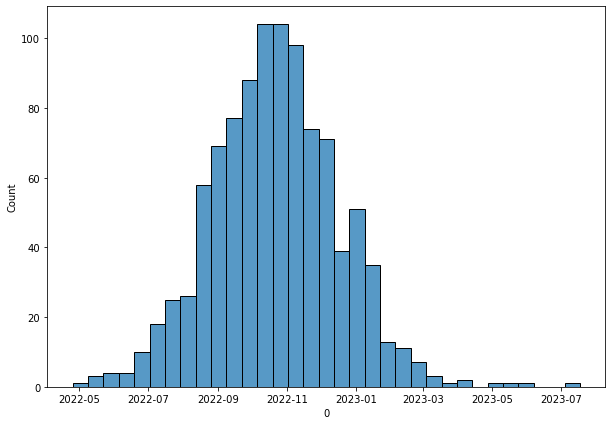

In [1132]:
data_final_andar_df_norm = pd.DataFrame(monte_carlo_ativ_norm(df_train=df_test, df_test=df_test, atividade='MASSA PVA/', data_inicio='2022-02-23', num_iter=1000))
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data_final_andar_df_norm[0], ax=ax)

In [1130]:
atualizacao_torre_b
mask_ativ_test = (atualizacao_torre_b['Descrição dos Serviços'].str.contains('MASSA PVA/'))
atualizacao_torre_b[mask_ativ_test].sort_values(by='Início.1')

,ID.,Outline,Critical,Descrição dos Serviços,Empreiteiro,Dur,Início,Fim,Início.1,Fim.1,%,Início.2,Fim.2,Observações,periodo,Andar,torre
3355,7744,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 8 ANDAR,Empresa 18,5.0,2023-01-12,2023-01-18,2022-02-23,2022-03-01,1.0,NaT,NaT,NaN,2022-03-01,8,B
2735,7710,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 8 ANDAR,NaN,5.0,2023-01-12,2023-01-18,2022-02-28,2022-03-04,NaN,2022-02-28,2022-03-04,Definindo plano de recuperação junto ao emprei...,2022-02-01,8,B
3354,7743,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 9 ANDAR,Empresa 18,5.0,2023-01-05,2023-01-11,2022-03-02,2022-03-08,1.0,NaT,NaT,NaN,2022-03-01,9,B
2734,7709,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 9 ANDAR,NaN,5.0,2023-01-05,2023-01-11,2022-03-07,2022-03-11,NaN,2022-03-07,2022-03-11,Definindo plano de recuperação junto ao emprei...,2022-02-01,9,B
3353,7742,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 10 ANDAR,Empresa 18,5.0,2022-12-29,2023-01-04,2022-03-09,2022-03-15,1.0,NaT,NaT,NaN,2022-03-01,10,B
2733,7708,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 10 ANDAR,NaN,5.0,2022-12-29,2023-01-04,2022-03-14,2022-03-18,NaN,2022-03-14,2022-03-18,Definindo plano de recuperação junto ao emprei...,2022-02-01,10,B
3352,7741,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 11 ANDAR,Empresa 18,5.0,2022-12-22,2022-12-28,2022-03-21,2022-03-25,NaN,2022-03-21,2022-03-25,NaN,2022-03-01,11,B
3844,7740,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 12 ANDAR,Empresa 18,5.0,2022-12-15,2022-12-21,2022-04-07,2022-04-13,1.0,NaT,NaT,NaN,2022-05-01,12,B
3843,7739,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 13 ANDAR,Empresa 18,5.0,2022-12-08,2022-12-14,2022-04-18,2022-04-22,1.0,NaT,NaT,NaN,2022-05-01,13,B
3842,7738,4,Yes,MASSA PVA/ 1ª DEMÃO DE PINTURA - 14 ANDAR,Empresa 18,5.0,2022-12-01,2022-12-07,2022-04-25,2022-04-29,1.0,NaT,NaT,NaN,2022-05-01,14,B
